## <font color='purple'> Credit Card Fraud Detection </font>

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,confusion_matrix
from sklearn.pipeline import Pipeline
 
from sklearn import linear_model
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score,StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN


from sklearn.pipeline import Pipeline

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from imblearn.combine import SMOTETomek,SMOTEENN
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report

from xgboost.sklearn import XGBClassifier

import lightgbm
from lightgbm import LGBMClassifier


import warnings
warnings.filterwarnings('ignore')

### <font color='purple'> Exploratory data analysis </font>

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### observe the different feature type present in the data

In [4]:
#Checking ROws and Columns
df.shape

(284807, 31)

#### Data set has 284807 rows and 31 columns

In [5]:
# Checking Data set info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

####  All columns are numeric 

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# Checking NULL Values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### It is good that no null values in the data set.

In [8]:
# Checking columns
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Here we will observe the distribution of our classes

In [9]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print("Normal_share :",normal_share);
print("Fraud_share :",fraud_share);

Normal_share : 99.82725143693798
Fraud_share : 0.1727485630620034


##### From Above code we can understand that  99.82% in the data set contains no fraud data that is normal share.
##### Only 0.17% in the data set is treated as fraud data

Text(0.5, 1.0, 'Bar plot for the number and percentage of fraudulent vs non-fraudulent')

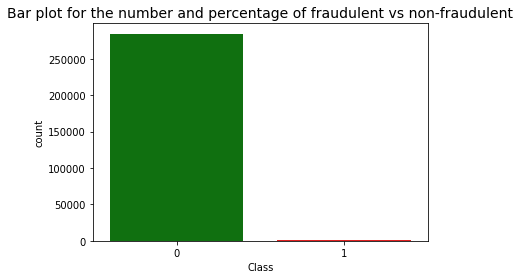

In [10]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
import seaborn as sns
Colours=['g','r']
sns.countplot('Class', data=df, palette=Colours)
plt.title('Bar plot for the number and percentage of fraudulent vs non-fraudulent', fontsize=14)

#### 0  indicates  Non-Fraudulent
#### 1 indicates Fraudulent
#### So we can see that data set is highly imbalanced between Non-Fraudulent and Fraudulent data

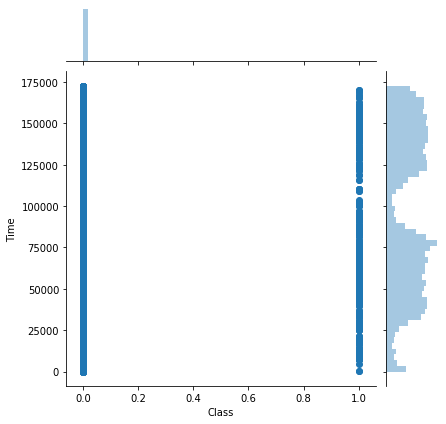

In [11]:
# Create a scatter plot to observe the distribution of classes with time

sns.jointplot(df.Class,df.Time)
#plt.show()


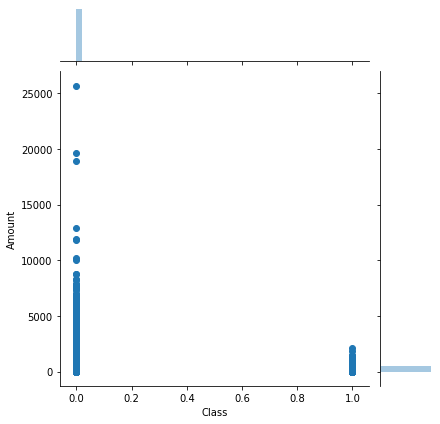

In [12]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.jointplot(df.Class,df.Amount)
plt.show()


### Drop unnecessary columns


- Here 28 columns are Transformed using PCA for security reasons.So it is difficult to make assumption about unnecessary columns.we decided that do not drop the columns and feed all of them in to model and let the model decide  which feature should exists or not


### Splitting the data into train & test data

In [13]:
x=df.drop("Class",axis=1)
y=df.Class #class variable

In [14]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 4, stratify = y)

In [15]:
#print shapes of train and test sets
X_train.shape

(213605, 30)

In [16]:
# print shapes of train and test sets
X_test.shape

(71202, 30)

In [17]:
# print shapes of train and test sets
y_train.shape

(213605,)

In [18]:
# print shapes of train and test sets
y_test.shape

(71202,)

### Scaling Time & Amount column

In [19]:
scaler = StandardScaler()

In [20]:
features = ['Time','Amount']

In [21]:
X_train[features] = scaler.fit_transform(X_train[features].values)
X_test[features] = scaler.transform(X_test[features].values)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [22]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
369
123


### Plotting the distribution of a variable

In [23]:
#Checking Skewness of all columns.
#For normally distributed data, the skewness should be about zero
#a skewness value greater than zero means that there is more weight in the right tail of the distribution. 
from scipy.stats import skew
skew(df, axis=1, bias=True, nan_policy='propagate')

array([5.28880051, 2.1569084 , 5.29233445, ..., 5.29465008, 5.29465136,
       5.29463801])

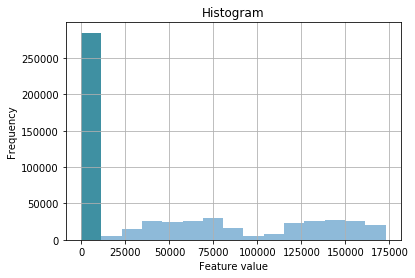

In [24]:
# plot the histogram of a variable from the dataset to see the skewness
df.plot.hist(alpha=0.5, bins=15, grid=True, legend=None)  # Pandas helper function to plot a hist. Uses matplotlib under the hood.
plt.xlabel("Feature value")
plt.title("Histogram")
plt.show()

-  Skewness exists in right tail ..That means more weight in the right tail of the distribution. 

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [25]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
#preprocessing.PowerTransformer(df,method='yeo-johnson', standardize=True, copy=False)
pt = PowerTransformer(copy=False)
X_train[X_train.columns] = pt.fit_transform(X_train)
X_train.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
268409,1.443924,-1.094058,-0.777078,2.250193,-1.992185,-0.619437,-1.120780,-0.040269,0.199827,1.936235,...,0.428591,0.168738,0.212329,0.249166,1.688915,1.340768,-0.728417,0.548670,0.466961,1.390144
284293,1.637938,-0.036658,0.699302,0.713895,2.839778,-0.254771,1.383620,-1.418995,-1.881484,-1.118975,...,0.953905,-1.541038,1.391591,-0.086109,0.705435,0.409435,1.171215,0.471412,0.959151,-0.570368
158925,0.357582,-0.568132,-0.314122,1.144006,-2.354895,-0.367690,-0.762785,0.064723,-0.259160,-2.346893,...,-0.413474,-0.202590,-0.176258,-0.616344,-0.050481,1.431894,-0.173240,0.019833,0.153136,-0.574366
230245,1.083760,-1.157989,-3.678656,-1.549119,1.857800,-2.019963,0.873879,1.510169,-0.451081,-1.610282,...,4.956193,0.645423,-3.935557,-1.978519,-0.597958,-3.367950,2.600567,-1.337556,0.908337,2.094706
67330,-0.891977,-1.305244,0.013899,0.491427,-0.031809,-1.296613,-0.161780,-0.724074,1.450880,-0.044532,...,-0.763303,0.199927,0.438108,0.737719,1.095290,-1.276521,1.639075,-0.606326,-1.485541,0.573391


In [26]:

X_test[X_test.columns] = pt.transform(X_test)
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
156416,0.275504,1.201813,-0.589196,0.608259,1.264584,-0.918495,1.112506,-1.535405,0.664590,3.043704,...,-0.585291,0.003957,0.889734,0.324501,1.041279,-0.523984,-1.219989,0.212496,-0.092859,-1.040159
278188,1.547965,-1.139578,0.424259,0.163560,-0.588563,-0.054488,1.102499,-0.598036,1.685890,0.265707,...,-0.414100,0.487077,1.655133,-0.005777,-1.995073,-0.407815,1.461876,0.457054,0.166582,0.058262
238894,1.160650,-0.594203,-0.182462,-0.719645,-0.365032,1.519096,-1.136367,1.615469,-0.708507,-0.919551,...,0.674706,0.759035,2.084918,-0.202836,-0.549448,0.569742,0.886192,-0.322743,-0.135231,1.404802
208021,0.886190,-0.396042,0.510849,-0.306608,-0.123377,1.284054,-1.420142,1.524142,-0.824712,-0.905317,...,0.270228,0.486113,1.836574,-1.044912,0.128696,1.559458,1.260482,-0.315446,-0.362757,-0.920444
74684,-0.824516,-1.237344,1.005418,1.368007,0.181360,-1.023898,0.118752,-0.652660,1.169876,0.578818,...,-0.206766,0.106291,0.017404,0.000054,0.627380,0.223637,0.765175,-1.004361,0.383719,-0.907334


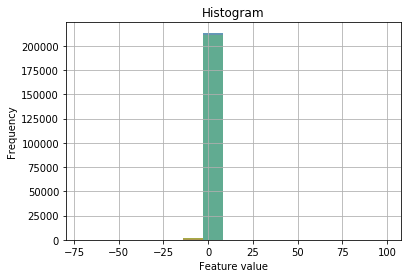

In [27]:
# plot the histogram of a variable from the dataset again to see the result 
df1 = pd.DataFrame(X_train)
df1.plot.hist(alpha=0.5, bins=15, grid=True, legend=None)  # Pandas helper function to plot a hist. Uses matplotlib under the hood.

# Plot a line of the fitted distribution over the top

plt.xlabel("Feature value")
plt.title("Histogram")
plt.show()

###### The Histogram looks like good and more gaussian 

## Model Building on the imbalanced dataset and Balanced dataset
- Build different models on the imbalanced dataset and see the result

### 1.Logistic Regression imbalanced data

In [30]:
num_C =  np.logspace(-4, 4, 50)  #--> list of values
print(num_C)

[1.00000000e-04 1.45634848e-04 2.12095089e-04 3.08884360e-04
 4.49843267e-04 6.55128557e-04 9.54095476e-04 1.38949549e-03
 2.02358965e-03 2.94705170e-03 4.29193426e-03 6.25055193e-03
 9.10298178e-03 1.32571137e-02 1.93069773e-02 2.81176870e-02
 4.09491506e-02 5.96362332e-02 8.68511374e-02 1.26485522e-01
 1.84206997e-01 2.68269580e-01 3.90693994e-01 5.68986603e-01
 8.28642773e-01 1.20679264e+00 1.75751062e+00 2.55954792e+00
 3.72759372e+00 5.42867544e+00 7.90604321e+00 1.15139540e+01
 1.67683294e+01 2.44205309e+01 3.55648031e+01 5.17947468e+01
 7.54312006e+01 1.09854114e+02 1.59985872e+02 2.32995181e+02
 3.39322177e+02 4.94171336e+02 7.19685673e+02 1.04811313e+03
 1.52641797e+03 2.22299648e+03 3.23745754e+03 4.71486636e+03
 6.86648845e+03 1.00000000e+04]


#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [31]:
skf = StratifiedKFold(n_splits=5)

In [32]:
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [33]:
#perfom cross validation on the X_train & y_train
#perfom cross validation on the X_train & y_train
for train_index,test_index in skf.split(X_train,y_train):

   
    X_train_cv = X_train.iloc[train_index]
    X_test_cv = X_train.iloc[test_index]
    
    y_train_cv = y_train.iloc[train_index]
    y_test_cv = y_train.iloc[test_index]

##### Hyper Parameter Tunning


In [0]:
#Hyper Parameter Tunning
logistic = linear_model.LogisticRegression(class_weight='balanced',random_state=42)
steps = [
        
         ("logistic",logistic )
        ]
logistic_pipeline = Pipeline(steps)

# Create a list of options for the regularization penalty


params = { 'logistic__C': num_C, 'logistic__penalty': ['l1', 'l2']}


# create gridsearch object
clf = GridSearchCV(estimator=logistic_pipeline, cv=skf, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
                 

In [0]:
# fit model with best Params
clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 20.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='warn',
                                                           n_jobs=None,
                                                           penalty='l2',
                           

In [0]:
# print best hyperparameters
print("Best AUC: ", clf.best_score_)
print("Best hyperparameters: ", clf.best_params_)

Best AUC:  0.9786363652483286
Best hyperparameters:  {'logistic__C': 0.0009540954763499944, 'logistic__penalty': 'l1'}


In [43]:
#Best hyperparameters tuning
clf_logic= linear_model.LogisticRegression(C=0.0009540954763499944, penalty='l1',
                                           random_state=42,class_weight='balanced',solver='saga')
#fit
clf_logic.fit(X_train,y_train)                                                           

LogisticRegression(C=0.0009540954763499944, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
# predict  on train data
y_train_pred = clf_logic.predict(X_train)

# check area under curve
y_train_pred_prob = clf_logic.predict_proba(X_train)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train, y_train_pred_prob),4))

AUC of train data:    	 0.9832


In [46]:
# predict  on test data
y_test_pred = clf_logic.predict(X_test)

# check area under curve
y_test_pred_prob = clf_logic.predict_proba(X_test)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

AUC of test data:    	 0.9828


- Logistic Regression with default weight assigned gives ROC score as 98.28% in Test data and 98.32% in Train

 ### Logistic Regression with balanced data set

##### Class Balancing   

#### (i) Random UnderSampling

In [47]:
log_sampler = RandomUnderSampler(random_state=42)
#Balancing onX_train_cv and y_train_cv
X_train_under,y_train_under = log_sampler.fit_resample(X_train_cv,y_train_cv)
print(X_train_under.shape)

(590, 30)


In [0]:
#Hyper Parameter Tunning
logistic = linear_model.LogisticRegression(class_weight='balanced',random_state=42)
steps = [
        
         ("logistic",logistic )
        ]
logistic_pipeline = Pipeline(steps)
# Create a list of options for the regularization penalty
#penalty = ['l1', 'l2']

params = { 'logistic__C': num_C, 'logistic__penalty': ['l1', 'l2']}


# create gridsearch object
clf_under = GridSearchCV(estimator=logistic_pipeline, cv=skf, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
                 

In [0]:
# fit model 
clf_under.fit(X_train_under,y_train_under)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='warn',
                                                           n_jobs=None,
                                                           penalty='l2',
                           

In [0]:
# print best hyperparameters
print("Best AUC: ", clf_under.best_score_)
print("Best hyperparameters: ", clf_under.best_params_)

Best AUC:  0.9775776836158191
Best hyperparameters:  {'logistic__C': 0.12648552168552957, 'logistic__penalty': 'l1'}


In [49]:
#best hyperparameters 
clf_logic_under= linear_model.LogisticRegression(C=0.12648552168552957, penalty='l1', 
                                                 random_state=42,solver='saga')

clf_logic_under.fit(X_train_under,y_train_under)                                                           

LogisticRegression(C=0.12648552168552957, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
# predict  on train data
y_pred = clf_logic_under.predict(X_train_under)

# check area under curve
y_train_pred_prob = clf_logic_under.predict_proba(X_train_under)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train_under, y_train_pred_prob),4))

AUC of train data:    	 0.9846


In [52]:
# predict  on test data
y_test_pred = clf_logic_under.predict(X_test)

# check area under curve
y_pred_prob = clf_logic_under.predict_proba(X_test)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

AUC of test data:    	 0.9828


- Logistic Regression with Random Under Sampling gives ROC Score 98.28% in Test data and 98.46% in Train data 

##### ii) Random Over Sampling

In [53]:
log_sampler = RandomOverSampler(random_state=42)
#Balancing onX_train_cv and y_train_cv
X_train_over,y_train_over = log_sampler.fit_resample(X_train_cv,y_train_cv)
print(X_train_over.shape)

(341178, 30)


In [0]:
logistic = linear_model.LogisticRegression(class_weight='balanced',random_state=42)
steps = [
        
         ("logistic",logistic )
        ]
logistic_pipeline = Pipeline(steps)
# Create a list of options for the regularization penalty
#penalty = ['l1', 'l2']

params = { 'logistic__C': num_C, 'logistic__penalty': ['l1', 'l2']}


# create gridsearch object
clf_over = GridSearchCV(estimator=logistic_pipeline, cv=skf, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
                 

In [0]:
# fit model 
clf_over.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 15.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='warn',
                                                           n_jobs=None,
                                                           penalty='l2',
                           

In [0]:
# print best hyperparameters
print("Best AUC: ", clf_over.best_score_)
print("Best hyperparameters: ", clf_over.best_params_)

Best AUC:  0.9888224275097086
Best hyperparameters:  {'logistic__C': 0.18420699693267145, 'logistic__penalty': 'l2'}


In [54]:
#Tunning with optimal parameters

clf_logic_over= linear_model.LogisticRegression(C=0.18420699693267145, penalty='l2',random_state=42)
#fit the model
clf_logic_over.fit(X_train_over,y_train_over)                                                       

LogisticRegression(C=0.18420699693267145, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
# predict  on train data
y_train_pred = clf_logic_over.predict(X_train_over)

# check area under curve
y_train_pred_prob = clf_logic_over.predict_proba(X_train_over)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train_over, y_train_pred_prob),4))

AUC of train data:    	 0.9888


In [56]:
# predict  on test data
y_test_pred = clf_logic_over.predict(X_test)
# check area under curve
y_test_pred_prob = clf_logic_over.predict_proba(X_test)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

AUC of test data:    	 0.9846


- Logistic Regression with Random Over Sampling gives Roc Score as  98.46% in Test data and 98.88% in Train

##### iii) Applying SMOTE Technique on Logistic Regression

In [34]:
# for "imblearn package" installing use pip install -U imbalanced-learn
smt = SMOTE(random_state=42)
X_train_smt, y_train_smt = smt.fit_sample(X_train_cv, y_train_cv)

In [58]:
X_train_smt.shape

(341178, 30)

In [59]:
y_train_smt.shape

(341178,)

In [0]:
#Hyper Parameter Tunning

logistic = linear_model.LogisticRegression(class_weight='balanced',random_state=42)
steps = [
        
         ("logistic",logistic )
        ]
logistic_pipeline = Pipeline(steps)
# Create a list of options for the regularization penalty
#penalty = ['l1', 'l2']

params = { 'logistic__C': num_C, 'logistic__penalty': ['l1', 'l2']}


# create gridsearch object
clf_smt = GridSearchCV(estimator=logistic_pipeline, cv=skf, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
                 

In [0]:
# fit model 
clf_smt.fit(X_train_smt, y_train_smt)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 16.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='warn',
                                                           n_jobs=None,
                                                           penalty='l2',
                           

In [0]:
# print best hyperparameters
print("Best AUC: ", clf_smt.best_score_)
print("Best hyperparameters: ", clf_smt.best_params_)

Best AUC:  0.9915269329770359
Best hyperparameters:  {'logistic__C': 3237.45754281764, 'logistic__penalty': 'l2'}


In [60]:
#Tuning Optimal Parameters
clf_logic_smt= linear_model.LogisticRegression(C=3237.45754281764, penalty='l2',random_state=42)

#fit the model
clf_logic_smt.fit(X_train_smt, y_train_smt)                                                                                        

LogisticRegression(C=3237.45754281764, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
# predict  on train data
y_train_pred = clf_logic_smt.predict(X_train_smt)

# check area under curve
y_train_pred_prob = clf_logic_smt.predict_proba(X_train_smt)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train_smt, y_train_pred_prob),4))

AUC of train data:    	 0.9915


In [62]:
# predict  on test data
y_test_pred = clf_logic_smt.predict(X_test)

# check area under curve
y_test_pred_prob = clf_logic_smt.predict_proba(X_test)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

AUC of test data:    	 0.9842


### Print the class distribution after applying SMOTE 

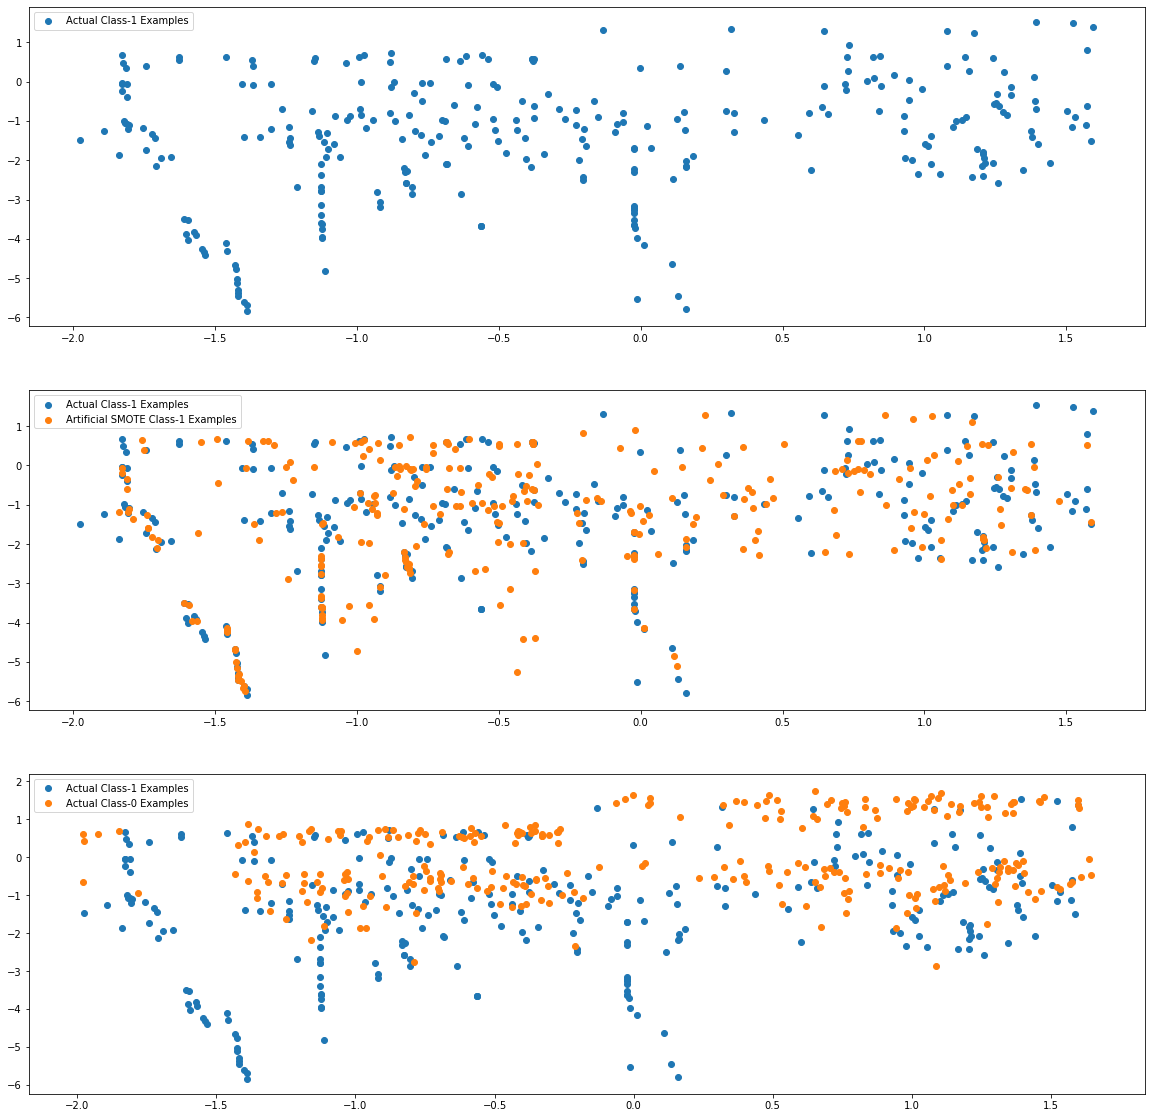

In [67]:
import warnings
warnings.filterwarnings("ignore")


sm = SMOTE(random_state=0)
#balancing on X_train_cv and y_tarin_cv
X_train_smote, y_train_smote = sm.fit_resample(X_train_cv, y_train_cv)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train_cv.shape[0]:]

X_train_1 = X_train_cv.values[np.where(y_train_cv==1.0)]
X_train_0 = X_train_cv.values[np.where(y_train_cv==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.values[:X_train_1.shape[0], 0], X_train_smote_1.values[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[0:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

- Logistic Regression with SMOTE,gives ROC score as 98.49% in Test data and 99.15% in Train

##### iV) SMOTETOMEK

In [68]:
smt_TOMEK = SMOTETomek(random_state=42)

#Balancing on X_train_cv and y_train_cv
X_train_smt_TOMEK, y_train_smt_TOMEK = smt_TOMEK.fit_sample(X_train_cv, y_train_cv)
print(X_train_smt_TOMEK.shape)
print(y_train_smt_TOMEK.shape)

(341178, 30)
(341178,)


In [0]:
#Hyper Parameter Tunning
logistic = linear_model.LogisticRegression(class_weight='balanced',random_state=42)
steps = [
        
         ("logistic",logistic )
        ]
logistic_pipeline = Pipeline(steps)
# Create a list of options for the regularization penalty
#penalty = ['l1', 'l2']

params = { 'logistic__C': num_C, 'logistic__penalty': ['l1', 'l2']}


# create gridsearch object
clf_smt_TOMEK = GridSearchCV(estimator=logistic_pipeline, cv=skf, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
# fit model 
clf_smt_TOMEK.fit(X_train_smt_TOMEK, y_train_smt_TOMEK)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 15.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='warn',
                                                           n_jobs=None,
                                                           penalty='l2',
                           

In [0]:
# print best hyperparameters
print("Best AUC: ", clf_smt_TOMEK.best_score_)
print("Best hyperparameters: ", clf_smt_TOMEK.best_params_)

Best AUC:  0.9915269329770359
Best hyperparameters:  {'logistic__C': 3237.45754281764, 'logistic__penalty': 'l2'}


In [69]:
#Fitting Optimal Parameters
clf_logic_smt_TOMEK= linear_model.LogisticRegression(C=3237.45754281764, penalty='l2',random_state=42)
#fit model 
clf_logic_smt_TOMEK.fit(X_train_smt_TOMEK, y_train_smt_TOMEK)

LogisticRegression(C=3237.45754281764, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
# predict on train data
y_train_pred = clf_logic_smt_TOMEK.predict(X_train_smt_TOMEK)

# check area under curve
y_train_pred_prob = clf_logic_smt_TOMEK.predict_proba(X_train_smt_TOMEK)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train_smt_TOMEK, y_train_pred_prob),4))

AUC of train data:    	 0.9915


In [71]:
# predict  on test data
y_test_pred = clf_logic_smt_TOMEK.predict(X_test)

# check area under curve
y_test_pred_prob = clf_logic_smt_TOMEK.predict_proba(X_test)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

AUC of test data:    	 0.9842


- Logistic Regression with SMOTETomek also gives ROC score as 98.42% in Test data and 99.15% in Train

##### V)SMOTEENN

In [72]:
sample_ENN=SMOTEENN(random_state=42)
X_train_smt_ENN, y_train_smt_ENN = sample_ENN.fit_sample(X_train_cv, y_train_cv)
print(X_train_smt_ENN.shape)
print(y_train_smt_ENN.shape)

(340881, 30)
(340881,)


In [0]:
#Hyper Parameter Tunning

logistic = linear_model.LogisticRegression(class_weight='balanced',random_state=42)
steps = [
        
         ("logistic",logistic )
        ]
logistic_pipeline = Pipeline(steps)
# Create a list of options for the regularization penalty
#penalty = ['l1', 'l2']

params = { 'logistic__C': num_C, 'logistic__penalty': ['l1', 'l2']}


# create gridsearch object
clf_smt_ENN = GridSearchCV(estimator=logistic_pipeline, cv=skf, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
# fit model 
clf_smt_ENN.fit(X_train_smt_ENN, y_train_smt_ENN)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 16.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='warn',
                                                           n_jobs=None,
                                                           penalty='l2',
                           

In [0]:
# print best hyperparameters
print("Best AUC: ", clf_smt_ENN.best_score_)
print("Best hyperparameters: ", clf_smt_ENN.best_params_)

Best AUC:  0.9917570944373822
Best hyperparameters:  {'logistic__C': 0.02811768697974228, 'logistic__penalty': 'l2'}


In [73]:
#FITTING OPTIMAL PARAMETERS
clf_logic_smt_ENN= linear_model.LogisticRegression(C= 0.02811768697974228, penalty='l2',random_state=42)

clf_logic_smt_ENN.fit(X_train_smt_ENN, y_train_smt_ENN)

LogisticRegression(C=0.02811768697974228, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
# predict  on train data
y_train_pred = clf_logic_smt_ENN.predict(X_train_smt_ENN)
# check area under curve
y_train_pred_prob = clf_logic_smt_ENN.predict_proba(X_train_smt_ENN)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train_smt_ENN, y_train_pred_prob),4))

AUC of train data:    	 0.9918


In [75]:
# predict  on test data
y_test_pred = clf_logic_smt_ENN.predict(X_test)

# check area under curve
y_test_pred_prob = clf_logic_smt_ENN.predict_proba(X_test)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

AUC of test data:    	 0.9848


- Logistic Regression with SMOTEENN gives ROC 98.48% in Test Data and 99.18% in Train data

##### Vi) ADASYN

In [0]:
adasyn=ADASYN(random_state=42)
X_train_ada, y_train_ada = adasyn.fit_sample(X_train_cv, y_train_cv)
print(X_train_ada.shape)
print(y_train_ada.shape)

(341170, 30)
(341170,)


In [0]:
#Hyper Parameter Tunning

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
logistic = linear_model.LogisticRegression(class_weight='balanced',random_state=42)
steps = [
        
         ("logistic",logistic )
        ]
logistic_pipeline = Pipeline(steps)
# Create a list of options for the regularization penalty
#penalty = ['l1', 'l2']

params = { 'logistic__C': num_C, 'logistic__penalty': ['l1', 'l2']}


# create gridsearch object
clf_ada = GridSearchCV(estimator=logistic_pipeline, cv=skf, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
# fit model 
clf_ada.fit(X_train_ada, y_train_ada)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 23.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='warn',
                                                           n_jobs=None,
                                                           penalty='l2',
                           

In [0]:
# print best hyperparameters
print("Best AUC: ", clf_ada.best_score_)
print("Best hyperparameters: ", clf_ada.best_params_)

Best AUC:  0.9536415517584855
Best hyperparameters:  {'logistic__C': 0.0013894954943731374, 'logistic__penalty': 'l1'}


In [0]:
#FITTING OPTIMAL PARAMETERS
clf_logic_ada= linear_model.LogisticRegression(C=0.0013894954943731374, penalty='l1',random_state=42)

clf_logic_ada.fit(X_train_ada, y_train_ada)

LogisticRegression(C=0.0013894954943731374, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# predict  on train data
y_train_pred = clf_logic_ada.predict(X_train_ada)

# check area under curve
y_train_pred_prob = clf_logic_ada.predict_proba(X_train_ada)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train_ada, y_train_pred_prob),4))

AUC of train data:    	 0.9713


In [0]:
# predict  on test data
y_test_pred = clf_logic_ada.predict(X_test)

# check area under curve
y_test_pred_prob = clf_logic_ada.predict_proba(X_test)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test, y_test_pred_prob),4))

AUC of test data:    	 0.9842


- Logistic Regression with ADASYN gives ROC 98.42% in Test Data and 97.13%  in Train data

### Print the class distribution after applying ADASYN

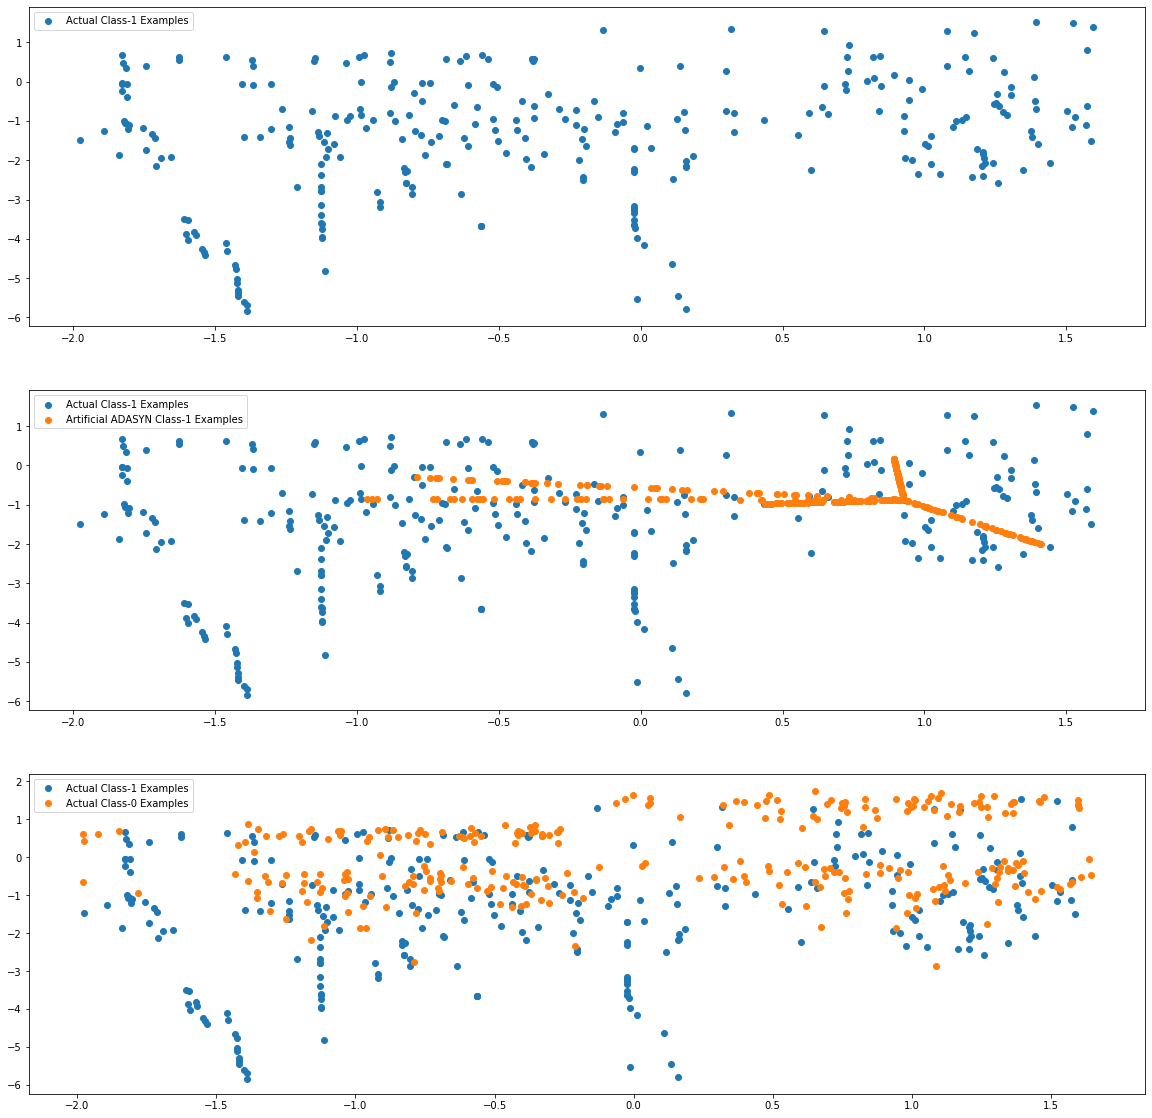

In [77]:
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train_cv, y_train_cv)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train_cv.shape[0]:]

X_train_1 = X_train_cv.values[np.where(y_train_cv==1.0)]
X_train_0 = X_train_cv. values[np.where(y_train_cv==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.values[:X_train_1.shape[0], 0], X_train_adasyn_1.values[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

#### Logistic Regresion Model Results

- <font color='purple'> Logistic Regression with default weight assigned gives ROC score as 98.28% in Test data and 98.32% in Train </font>
- <font color='purple'> Logistic Regression with Random Under Sampling gives ROC Score 98.28% in Test data and 98.46% in Train data </font>
- <font color='purple'>Logistic Regression with Random Over Sampling gives Roc Score as 98.46% in Test data and 98.88% in Train </font>
- <font color='green'> Logistic Regression with SMOTE,gives ROC score as 98.49% in Test data and 99.15% in Train </font>
- <font color='purple'> Logistic Regression with SMOTETomek also gives ROC score as 98.42% in Test data and 99.15% in Train </font>
- <font color='purple'> Logistic Regression with SMOTEENN gives ROC 98.48% in Test Data and 99.18% in Train data </font>
- <font color='purple'> Logistic Regression with ADASYN gives ROC 98.42% in Test Data and 97.13% in Train data </font>

### Decision Tree with imbalanced data

In [0]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [0]:
# Let's check the evaluation metrics of our default model
y_pred = dt.predict(X_test)
# check area under curve
y_pred_prob = dt.predict_proba(X_test)[:, 1]
print("AUC of test data of default model:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

AUC of test data of default model:    	 0.8941


##### Hyperparameter Tuning

In [0]:

from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier(random_state=42)
# parameters to build the model on
params = {"criterion": ['gini', 'entropy'],'max_depth': [5, 15, 5],'min_samples_leaf': [50, 150, 50],'min_samples_split': [50, 150, 50]}


# fit tree on imbalanced training data
clf= GridSearchCV(estimator=dtree, cv=skf, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
clf.fit(X_train, y_train)
#{'criterion': ['gini', 'entropy'],
                        # 'max_depth': [80, 90, 100, 110],
                         #'min_samples_leaf': [3, 4, 5],
                         #'min_samples_split': [8, 10, 12]},

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 17.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
        

In [0]:
# print best hyperparameters
print("Best AUC: ", clf.best_score_)
print("Best hyperparameters: ", clf.best_params_)

Best AUC:  0.9437257301108831
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 50, 'min_samples_split': 150}


#### Running the model with best parameters obtained from grid search

In [0]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",                         
                                  max_depth=15, 
                                  min_samples_leaf=50,
                                  min_samples_split=150,
                                 
                                 )
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=150,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
#Evaluate on train data 
from sklearn.metrics import roc_auc_score
# predict  on train data
y_pred =clf_gini.predict(X_train)
# check area under curve
y_pred_prob = clf_gini.predict_proba(X_train)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train, y_pred_prob),4))

AUC of train data:    	 0.9979


In [0]:
#Evaluate on test data 
from sklearn.metrics import roc_auc_score
# predict  on test data
y_pred =clf_gini.predict(X_test)
# check area under curve
y_pred_prob = clf_gini.predict_proba(X_test)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

AUC of test data:    	 0.9549


- Decision Tree with imbalanced data got 95.49% AUC in test

### Decision Tree model with Balanced data set

##### Cross validation 

In [0]:
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [0]:
folds = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
#perfom cross validation on the X_train & y_train
for train_index,test_index in folds.split(X_train,y_train):

   
    X_train_cv = X_train.iloc[train_index]
    X_test_cv = X_train.iloc[test_index]
    
    y_train_cv = y_train.iloc[train_index]
    y_test_cv = y_train.iloc[test_index]

##### Class Balancing Decision Tree

#### (i) Random UnderSampling

In [0]:
sampler = RandomUnderSampler(random_state=42)
#Balancing onX_train_cv and y_train_cv
X_train_random,y_train_random = sampler.fit_resample(X_train_cv,y_train_cv)
print(X_train_random.shape)


(592, 30)


#### Hyper Prameter Tuning

In [0]:
from sklearn.model_selection import GridSearchCV

dtree_random = DecisionTreeClassifier(random_state=42)
# parameters to build the model on
params = {"criterion": ['gini', 'entropy'],'max_depth': [5, 15, 5],'min_samples_leaf': [50, 100, 50],'min_samples_split': [50, 100, 50]}


# fit tree on balanced training data
clf_random=GridSearchCV(estimator=dtree_random, cv=5, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
clf_random.fit(X_train_random, y_train_random)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    3.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 15, 5],
                         'min_s

In [0]:
# print best hyperparameters
print("Best AUC: ", clf_random.best_score_)
print("Best hyperparameters: ", clf_random.best_params_)

Best AUC:  0.9509486181096352
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50}


#### Running the model with best parameters obtained from grid search

In [0]:
# model with optimal hyperparameters
from sklearn.tree import DecisionTreeClassifier
clf_dt =DecisionTreeClassifier(criterion='gini',
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                                
                            )
# fit
clf_dt.fit(X_train_random, y_train_random)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
#### Evaluate on Train data  
from sklearn.metrics import roc_auc_score
# predict  on train data
y_pred =clf_dt.predict(X_train_random)
y_pred_prob = clf_dt.predict_proba(X_train_random)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train_random, y_pred_prob),4))

AUC of train data:    	 0.9774


In [0]:
### Evaluate on Test data  
from sklearn.metrics import roc_auc_score
# predict  on test data
y_pred =clf_dt.predict(X_test)
# check area under curve
y_pred_prob = clf_dt.predict_proba(X_test)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

AUC of test data:    	 0.9745


##### Decision Tree with Random undersampling ,got 97.45  roc in test data and 97.74% in Train data

#### (ii) Random OverSampling

In [0]:
sampler = RandomOverSampler(random_state=42)
#balancing data on X_train_cv and y_train_cv
X_train_over,y_train_over = sampler.fit_resample(X_train_cv,y_train_cv)
print(X_train_over.shape)

(341178, 30)


##### Hyper Parameter Tuning

In [0]:
from sklearn.model_selection import GridSearchCV

dtree_random = DecisionTreeClassifier(random_state=42)
# parameters to build the model on
params = {"criterion": ['gini', 'entropy'],'max_depth': [5,10,5],'min_samples_leaf': [ 50,100,50],'min_samples_split': [ 50,100,50]}


# fit tree on balanced training data
clf=GridSearchCV(estimator=dtree_random, cv=5, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
clf.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 11.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 5],
                         'min_s

In [0]:
# print best hyperparameters
print("Best AUC: ", clf.best_score_)
print("Best hyperparameters: ", clf.best_params_)

Best AUC:  0.9996405887338559
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}


In [0]:
# model with optimal hyperparameters
from sklearn.tree import DecisionTreeClassifier
clf_dt_over =DecisionTreeClassifier(criterion='entropy',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=50,                             
                            )
# fit
clf_dt_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
#### Evaluate on Train data  
from sklearn.metrics import roc_auc_score
# predict  on train data
y_pred =clf_dt_over.predict(X_train_over)
y_pred_prob = clf_dt_over.predict_proba(X_train_over)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train_over, y_pred_prob),4))

AUC of train data:    	 0.9998


In [0]:
#### Evaluate on Test data  
from sklearn.metrics import roc_auc_score
# predict  on test data
y_pred =clf_dt_over.predict(X_test)
y_pred_prob = clf_dt_over.predict_proba(X_test)[:, 1]
print("AUC of testn data:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

AUC of testn data:    	 0.9221


- Decision Tree with Random oversampling got 92.21%  roc in test data

#### (iii) SMOTE

In [0]:
sm = SMOTE(random_state=42)
#balancing data on X_train_cv and  y_train_cv
X_train_smote, y_train_smote = sm.fit_resample(X_train_cv, y_train_cv)

In [0]:
print(X_train_smote.shape)
print(y_train_smote.shape)

(341178, 30)
(341178,)


In [0]:
from sklearn.model_selection import GridSearchCV

dtree_random = DecisionTreeClassifier(random_state=42)
# parameters to build the model on
params = {"criterion": ['gini', 'entropy'],'max_depth': [5,15,5],'min_samples_leaf': [50, 100, 50],'min_samples_split': [ 50,100,50]}


# fit tree on balanced training data
clf_smote=GridSearchCV(estimator=dtree_random, cv=5, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
clf_smote.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 19.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 15, 5],
                         'min_s

In [0]:
# print best hyperparameters
print("Best AUC: ", clf_smote.best_score_)
print("Best hyperparameters: ", clf_smote.best_params_)

Best AUC:  0.9992889152515227
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 50, 'min_samples_split': 50}


In [0]:
# model with optimal hyperparameters
from sklearn.tree import DecisionTreeClassifier
clf_dt_smote =DecisionTreeClassifier(criterion='entropy',
                             max_depth=15,
                             min_samples_leaf=50, 
                             min_samples_split=50,                             
                            )
# fit
clf_dt_smote.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
#### Evaluate on Train data  
from sklearn.metrics import roc_auc_score
# predict  on train data
y_pred =clf_dt_smote.predict(X_train_smote)
y_pred_prob = clf_dt_smote.predict_proba(X_train_smote)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train_smote, y_pred_prob),4))

AUC of train data:    	 0.9998


In [0]:
#### Evaluate on Test data  
from sklearn.metrics import roc_auc_score
# predict  on test data
y_pred =clf_dt_smote.predict(X_test)
y_pred_prob = clf_dt_smote.predict_proba(X_test)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

AUC of test data:    	 0.9369


- ROC Score of test data of Decision tree with smote is 93.69% 

#### Print the class distribution after applying SMOTE 

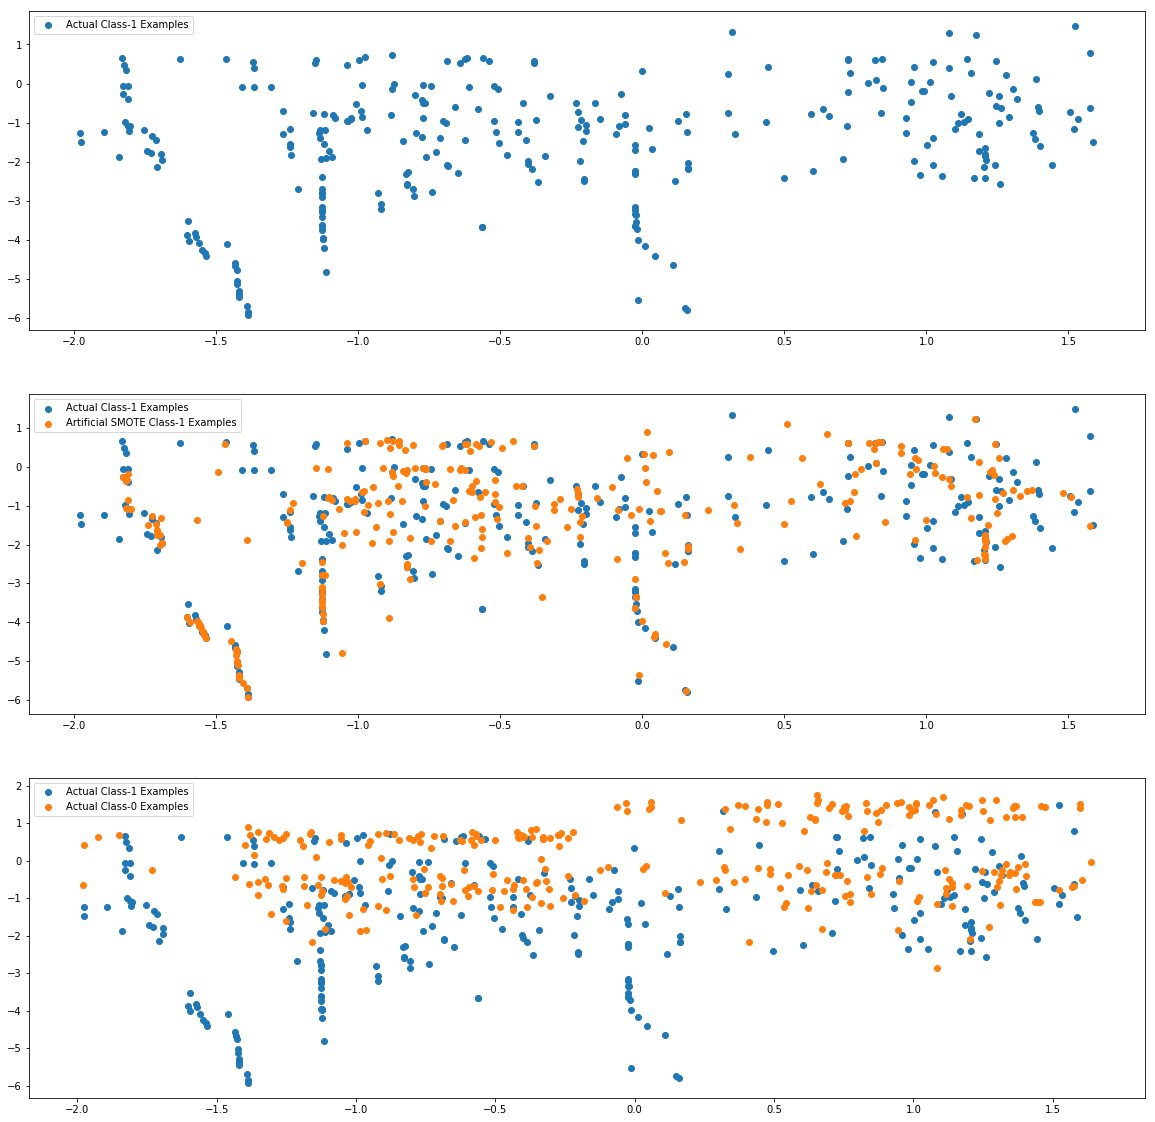

In [0]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train_cv, y_train_cv)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train_cv.shape[0]:]

X_train_1 = X_train_cv.values[np.where(y_train_cv==1.0)]
X_train_0 = X_train_cv.values[np.where(y_train_cv==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

#### (iv) ADASYN

In [0]:
from imblearn import over_sampling
ada = over_sampling.ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train_cv, y_train_cv)


In [0]:
from sklearn.model_selection import GridSearchCV

dtree_random = DecisionTreeClassifier(random_state=42)
# parameters to build the model on
params = {"criterion": ['gini', 'entropy'],'max_depth': [5,15,5],'min_samples_leaf': [50, 100, 50],'min_samples_split': [ 50,100,50]}


# fit tree on balanced training data
clf_adasyn=GridSearchCV(estimator=dtree_random, cv=5, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
clf_adasyn.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 19.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 15, 5],
                         'min_s

In [0]:
# print best hyperparameters
print("Best AUC: ", clf_adasyn.best_score_)
print("Best hyperparameters: ", clf_adasyn.best_params_)

Best AUC:  0.95300078689644
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 100, 'min_samples_split': 50}


In [0]:
# model with optimal hyperparameters
from sklearn.tree import DecisionTreeClassifier
clf_dt_adasyn =DecisionTreeClassifier(criterion='entropy',
                             max_depth=15,
                             min_samples_leaf=100, 
                             min_samples_split=50,                             
                            )
# fit
clf_dt_adasyn.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
#### Evaluate on Train data  
from sklearn.metrics import roc_auc_score
# predict  on train data
y_pred =clf_dt_adasyn.predict(X_train_adasyn)
y_pred_prob = clf_dt_adasyn.predict_proba(X_train_adasyn)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train_adasyn, y_pred_prob),4))

AUC of train data:    	 0.9994


In [0]:
#### Evaluate on test data  
from sklearn.metrics import roc_auc_score
# predict  on test data
y_pred =clf_dt_adasyn.predict(X_test)
# check area under curve
y_pred_prob = clf_dt_adasyn.predict_proba(X_test)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

AUC of test data:    	 0.92


- Adasyn with 92% AUC in Test data

#### Print the class distribution after applying ADASYN

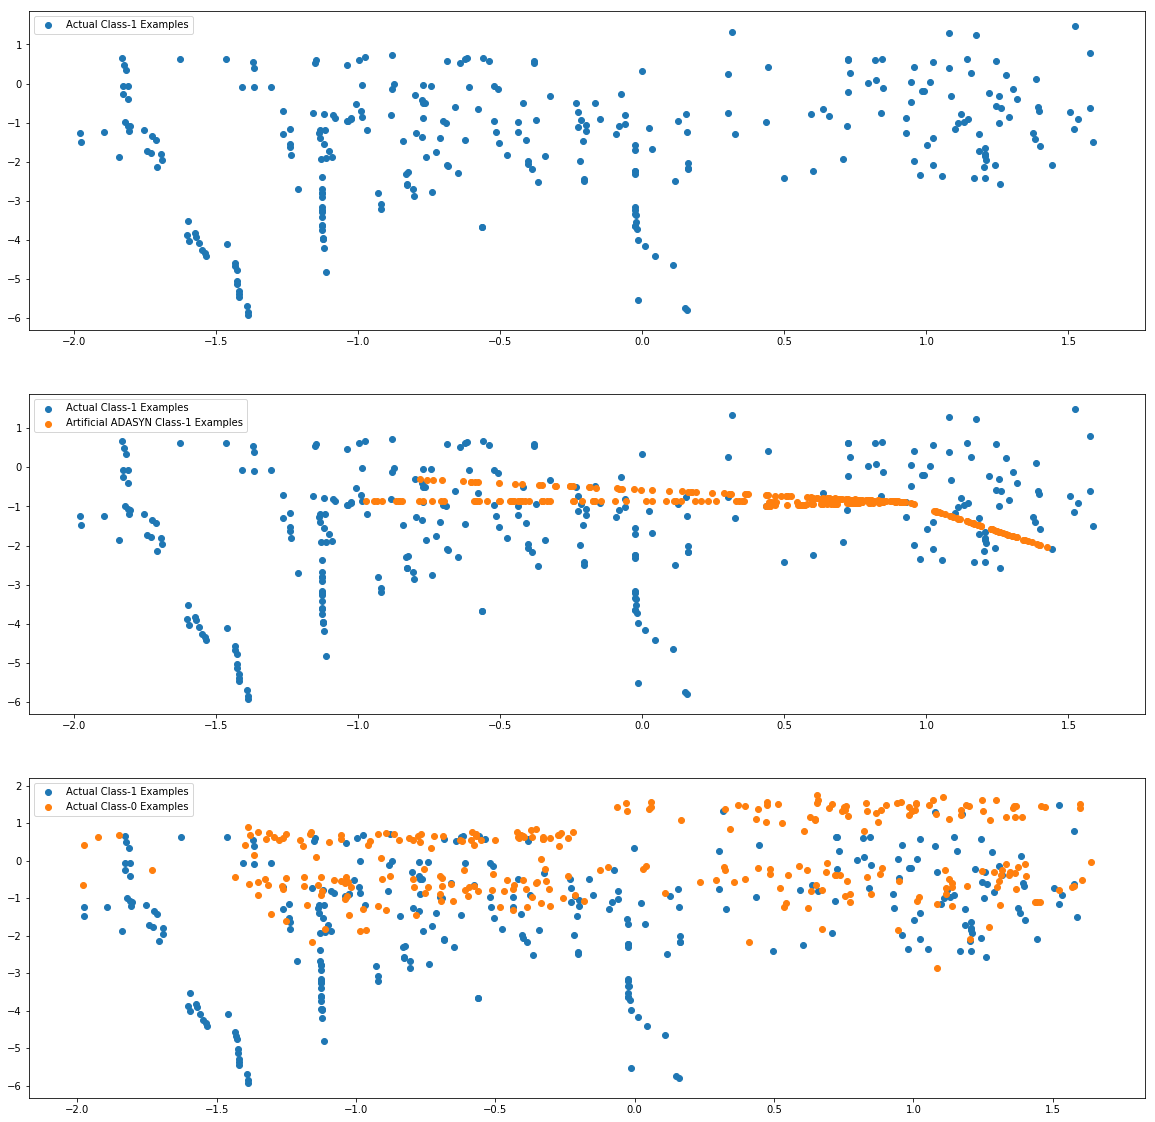

In [0]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train_cv, y_train_cv)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train_cv.shape[0]:]

X_train_1 = X_train_cv.values[np.where(y_train_cv==1.0)]
X_train_0 = X_train_cv.values[np.where(y_train_cv==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

##### V) SMOTETomek

In [0]:
sampler = SMOTETomek(random_state=42)
#balancing data on X_train_cv and y_train_cv
X_train_smttomek,y_train_smttomek = sampler.fit_resample(X_train_cv,y_train_cv)
print(X_train_smttomek.shape)
print(y_train_smttomek.shape)

(341178, 30)
(341178,)


In [0]:
from sklearn.model_selection import GridSearchCV

dtree_random = DecisionTreeClassifier(random_state=42)
# parameters to build the model on
params = {"criterion": ['gini', 'entropy'],'max_depth': [5,15,5],'min_samples_leaf': [50, 100, 50],'min_samples_split': [ 50,100,50]}


# fit tree on balanced training data
clf_smttomek=GridSearchCV(estimator=dtree_random, cv=5, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
clf_smttomek.fit(X_train_smttomek, y_train_smttomek)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 19.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 15, 5],
                         'min_s

In [0]:
# print best hyperparameters
print("Best AUC: ", clf_smttomek.best_score_)
print("Best hyperparameters: ", clf_smttomek.best_params_)

Best AUC:  0.9992889152515227
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 50, 'min_samples_split': 50}


In [0]:
# model with optimal hyperparameters
from sklearn.tree import DecisionTreeClassifier
clf_dt_smttomek =DecisionTreeClassifier(criterion='entropy',
                             max_depth=15,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             random_state=42           
                            )
# fit
clf_dt_smttomek.fit(X_train_smttomek, y_train_smttomek)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
# Evaluate on Train data  
from sklearn.metrics import roc_auc_score
# predict  on train data
y_pred =clf_dt_smttomek.predict(X_train_smttomek)
y_pred_prob = clf_dt_smttomek.predict_proba(X_train_smttomek)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train_smttomek, y_pred_prob),4))

AUC of train data:    	 0.9998


In [0]:
#### Evaluate on Train data  
from sklearn.metrics import roc_auc_score
# predict  on train data
y_pred =clf_dt_smttomek.predict(X_test)
y_pred_prob = clf_dt_smttomek.predict_proba(X_test)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

AUC of test data:    	 0.937


- Decision tree with SMOTETomek gave AUC as 93.7%

##### Vi) SMOTEENN

In [0]:
sampler = SMOTEENN(random_state=42)
#balancing data on X_train_cv and y_train_cv
X_train_smtENN,y_train_smtENN = sampler.fit_resample(X_train_cv,y_train_cv)
print(X_train_smtENN.shape)
print(y_train_smtENN.shape)

(340903, 30)
(340903,)


In [0]:
from sklearn.model_selection import GridSearchCV

dtree_random = DecisionTreeClassifier(random_state=42)
# parameters to build the model on
params = {"criterion": ['gini', 'entropy'],'max_depth': [5,15,5],'min_samples_leaf': [50, 100, 50],'min_samples_split': [ 50,100,50]}


# fit tree on balanced training data
clf_smtENN=GridSearchCV(estimator=dtree_random, cv=5, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
clf_smtENN.fit(X_train_smtENN, y_train_smtENN)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 19.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 15, 5],
                         'min_s

In [0]:
# print best hyperparameters
print("Best AUC: ", clf_smtENN.best_score_)
print("Best hyperparameters: ",clf_smtENN.best_params_)

Best AUC:  0.9993682895647115
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 50, 'min_samples_split': 50}


In [0]:
# model with optimal hyperparameters
from sklearn.tree import DecisionTreeClassifier
clf_dt_smtENN =DecisionTreeClassifier(criterion='entropy',
                             max_depth=15,
                             min_samples_leaf=50, 
                             min_samples_split=50, 
                             random_state=42         
                            )
# fit
clf_dt_smtENN.fit(X_train_smtENN, y_train_smtENN)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
#### Evaluate on Train data  
from sklearn.metrics import roc_auc_score
# predict  on train data
y_pred =clf_dt_smtENN.predict(X_train_smtENN)
y_pred_prob = clf_dt_smtENN.predict_proba(X_train_smtENN)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train_smtENN, y_pred_prob),4))

AUC of train data:    	 0.9998


In [0]:
#### Evaluate on TEST data  
from sklearn.metrics import roc_auc_score
# predict  on TEST data
y_pred =clf_dt_smtENN.predict(X_test)
y_pred_prob = clf_dt_smtENN.predict_proba(X_test)[:, 1]
print("AUC of TEST data:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

AUC of TEST data:    	 0.9249


- Decision tree with SMOTEENN has 92.49% ROC

#### Decision Tree model Results

- <font color='green'> Decision Tree with imbalanced data got 95.49% AUC in test </font>
- <font color='purple'> Decision Tree with Random oversampling got 92.21%  roc in test data </font>
- <font color='purple'> ROC Score of test data of Decision tree with smote is 93.69% </font>
- <font color='purple'> Adasyn with 92% AUC in Test data </font>
- <font color='purple'> Decision tree with SMOTETomek gave AUC as 93.7% </font>
- <font color='purple'> Decision tree with SMOTEENN has 92.49% ROC </font>

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 15
2nd Top var = 5
3rd Top var = 14


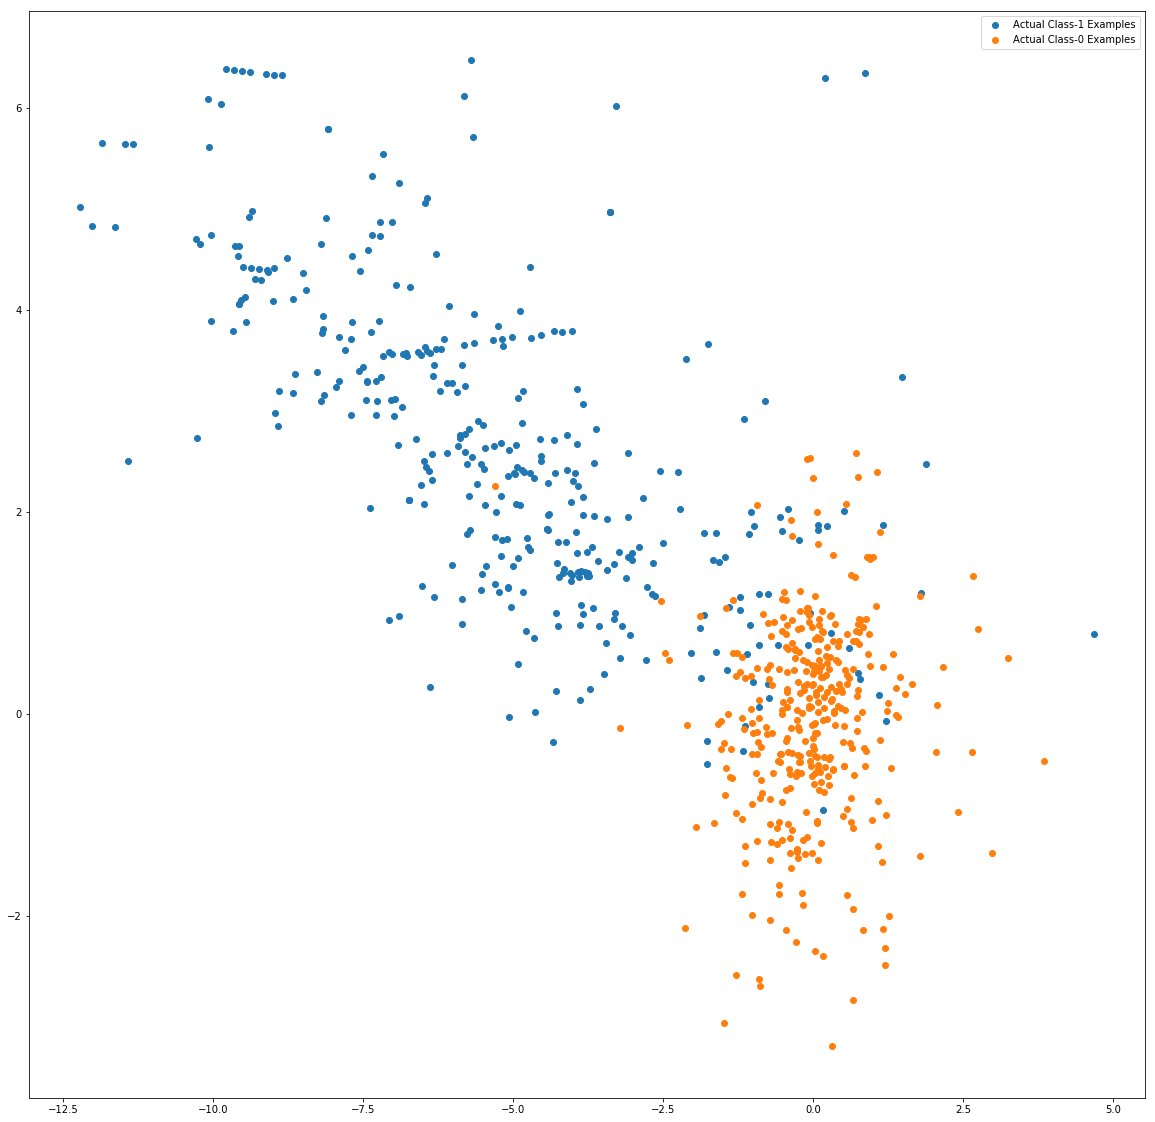

In [0]:
var_imp = []
for i in clf_dt.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf_dt.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf_dt.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf_dt.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf_dt.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf_dt.feature_importances_)[-2])

X_train_1 = X_train.values[np.where(y_train==1.0)]
X_train_0 = X_train.values[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()


### Random forest Tree with imbalanced data

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rfc = RandomForestClassifier(random_state=42)

In [0]:
#fit the default parameter
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
# Let's check the evaluation metrics of our default model
y_pred = rfc.predict(X_test)
# check area under curve
y_pred_prob = rfc.predict_proba(X_test)[:, 1]
print("AUC of test data of default model:    \t", round(roc_auc_score(y_test, y_pred_prob),4))
# Let's check the evaluation metrics of our default model

AUC of test data of default model:    	 0.9184


In [0]:
from sklearn.model_selection import GridSearchCV
  
# parameters to build the model on
params = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    #'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(random_state=42)
# fit tree on imbalanced training data
clf= GridSearchCV(estimator=rf, cv=skf, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 10.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start

In [0]:
# print best hyperparameters
print("Best AUC: ", clf.best_score_)
print("Best hyperparameters: ", clf.best_params_)

Best AUC:  0.9728807817044133
Best hyperparameters:  {'max_depth': 8, 'max_features': 10, 'min_samples_leaf': 300, 'min_samples_split': 200}


#### Running the model with best parameters obtained from grid search

In [0]:
# model with optimal hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf_rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=300, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100,
                             random_state=42
                            )
# fit
clf_rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=300, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
#### Evaluate on Train data  
from sklearn.metrics import roc_auc_score
# predict  on train data
y_pred =clf_rfc.predict(X_train)
# check area under curve
y_pred_prob = clf_rfc.predict_proba(X_train)[:, 1]
print("AUC of tain data:    \t", round(roc_auc_score(y_train, y_pred_prob),4))

AUC of tain data:    	 0.9928


In [0]:
#### Evaluate on test data 
from sklearn.metrics import roc_auc_score
# predict  on test data
y_pred =clf_rfc.predict(X_test)
# check area under curve
y_pred_prob = clf_rfc.predict_proba(X_test)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

AUC of test data:    	 0.9791


- Random forest with imbalanced dataset gets ROC Score 97.91%

### Random Forest with Balanced Dataset

#### Class Balancing in Random Forest

##### Cross Validation

In [14]:
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [15]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
#perfom cross validation on the X_train & y_train
for train_index,test_index in folds.split(X_train,y_train):

   
    X_train_cv = X_train.iloc[train_index]
    X_test_cv = X_train.iloc[test_index]
    
    y_train_cv = y_train.iloc[train_index]
    y_test_cv = y_train.iloc[test_index]

#### (i) Random UnderSampling

In [0]:
#Random Undersampling 
rfc_under=RandomUnderSampler(random_state=42)
#Balancing on X_train_cv and y_train_cv
X_train_rfc_under,y_train_rfc_under=rfc_under.fit_resample(X_train_cv,y_train_cv)
#Print the shapes of balanced data
print(X_train_rfc_under.shape)
print(y_train_rfc_under.shape)

(592, 30)
(592,)


In [0]:
from sklearn.model_selection import GridSearchCV
  
# parameters to build the model on
params = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    #'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(random_state=42)
# fit tree on balanced training data
clf_rf_under= GridSearchCV(estimator=rf, cv=skf, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
clf_rf_under.fit(X_train_rfc_under,y_train_rfc_under)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    4.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start

In [0]:
# print best hyperparameters
print("Best AUC: ", clf_rf_under.best_score_)
print("Best hyperparameters: ", clf_rf_under.best_params_)

Best AUC:  0.9598464460222934
Best hyperparameters:  {'max_depth': 4, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200}


In [0]:
# model with optimal hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf_rfc_under = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100,
                        
                            )
# fit
clf_rfc_under.fit(X_train_rfc_under,y_train_rfc_under)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
#### Evaluate on Train data  
from sklearn.metrics import roc_auc_score
# predict  on train data
y_pred =clf_rfc_under.predict(X_train_rfc_under)
# check area under curve
y_pred_prob = clf_rfc_under.predict_proba(X_train_rfc_under)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train_rfc_under, y_pred_prob),4))

AUC of train data:    	 0.9825


In [0]:
#### Evaluate on Test data  
from sklearn.metrics import roc_auc_score
# predict  on test data
y_pred =clf_rfc.predict(X_test)
# check area under curve
y_pred_prob = clf_rfc_under.predict_proba(X_test)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

AUC of test data:    	 0.9803


- Random Forest with Random Undersampling gives ROC score 98.03 in test dataset and 98.25 in train dataset

#### (ii) Random OverSampling

In [0]:
#Random Undersampling 
rfc_over=RandomOverSampler(random_state=42)
#balancing on X_train_cv and y_train_cv
X_train_rfc_over,y_train_rfc_over=rfc_over.fit_resample(X_train_cv,y_train_cv)
#Print the shapes of balanced data
print(X_train_rfc_over.shape)
print(y_train_rfc_over.shape)

(341178, 30)
(341178,)


In [0]:
from sklearn.model_selection import GridSearchCV
  
# parameters to build the model on
params = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    #'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(random_state=42)
# fit tree on balanced training data
clf_rf_over= GridSearchCV(estimator=rf, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
clf_rf_over.fit(X_train_rfc_over,y_train_rfc_over)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 11.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=Fa

In [0]:
# print best hyperparameters
print("Best AUC: ", clf_rf_over.best_score_)
print("Best hyperparameters: ", clf_rf_over.best_params_)

Best AUC:  0.9999420120913007
Best hyperparameters:  {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200}


In [0]:
# model with optimal hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf_rfc_over = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                            min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100,
                        
                            )
# fit
clf_rfc_over.fit(X_train_rfc_over,y_train_rfc_over)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
#### Evaluate on Train data  
from sklearn.metrics import roc_auc_score
# predict  on train data
y_pred =clf_rfc_over.predict(X_train_rfc_over)
# check area under curve
y_pred_prob = clf_rfc_over.predict_proba(X_train_rfc_over)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train_rfc_over, y_pred_prob),4))

AUC of train data:    	 1.0


In [0]:
#### Evaluate on Test data  
from sklearn.metrics import roc_auc_score
# predict  on test data
y_pred =clf_rfc_over.predict(X_test)
# check area under curve
y_pred_prob = clf_rfc_over.predict_proba(X_test)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

AUC of test data:    	 0.9747


- Random Forest with Random Over Sampling gives ROC score 97.47%  in test data and   100% in train data

#### (iii) SMOTE

In [0]:
 
rfc_smote=SMOTE(random_state=42)
#Balancing on X_train_cv and y_train_cv
X_train_rfc_smote,y_train_rfc_smote=rfc_smote.fit_resample(X_train_cv,y_train_cv)
#Print the shapes of balanced data
print(X_train_rfc_smote.shape)
print(y_train_rfc_smote.shape)


(341178, 30)
(341178,)


In [0]:
from sklearn.model_selection import GridSearchCV
  
# parameters to build the model on
params = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    #'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(random_state=42)
# fit tree on balanced training data
clf_rf_smote= GridSearchCV(estimator=rf, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
clf_rf_smote.fit(X_train_rfc_smote,y_train_rfc_smote)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 11.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=Fa

In [0]:
# print best hyperparameters
print("Best AUC: ", clf_rf_smote.best_score_)
print("Best hyperparameters: ", clf_rf_smote.best_params_)

Best AUC:  0.9999420120913007
Best hyperparameters:  {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200}


In [0]:
# model with optimal hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf_rfc_smote= RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100,
                        
                            )
# fit
clf_rfc_smote.fit(X_train_rfc_smote,y_train_rfc_smote)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
#### Evaluate on Train data  
from sklearn.metrics import roc_auc_score
# predict  on train data
y_pred =clf_rfc_smote.predict(X_train_rfc_smote)
# check area under curve
y_pred_prob = clf_rfc_smote.predict_proba(X_train_rfc_smote)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train_rfc_smote, y_pred_prob),4))

AUC of train data:    	 1.0


In [0]:
#### Evaluate on Test data  
from sklearn.metrics import roc_auc_score
# predict  on test data
y_pred =clf_rfc_smote.predict(X_test)
# check area under curve
y_pred_prob = clf_rfc_smote.predict_proba(X_test)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

AUC of test data:    	 0.98


- Random Forest with Smote gives 98% ROC in test data and 100% ROC in train data

#### (iv) ADASYN

In [0]:
 
rfc_ada=ADASYN(random_state=42)
#balancing on X_train_cv and y_train_cv
X_train_rfc_ada,y_train_rfc_ada=rfc_ada.fit_resample(X_train_cv,y_train_cv)
#Print the shapes of balanced data
print(X_train_rfc_ada.shape)
print(y_train_rfc_ada.shape)

(341179, 30)
(341179,)


In [0]:
from sklearn.model_selection import GridSearchCV
  
# parameters to build the model on
params = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    #'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(random_state=42)
# fit tree on balanced training data
clf_rf_ada= GridSearchCV(estimator=rf, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
clf_rf_ada.fit(X_train_rfc_ada,y_train_rfc_ada)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 12.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=Fa

In [0]:
# print best hyperparameters
print("Best AUC: ", clf_rf_ada.best_score_)
print("Best hyperparameters: ", clf_rf_ada.best_params_)

Best AUC:  0.9999420120913007
Best hyperparameters:  {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200}


In [0]:
# model with optimal hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf_rfc_ada = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100,
                        
                            )
# fit
clf_rfc_ada.fit(X_train_rfc_ada,y_train_rfc_ada)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
#### Evaluate on Train data  
from sklearn.metrics import roc_auc_score
# predict  on train data
y_pred =clf_rf_ada.predict(X_train_rfc_ada)
# check area under curve
y_pred_prob = clf_rf_ada.predict_proba(X_train_rfc_ada)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train_rfc_ada, y_pred_prob),4))

AUC of train data:    	 1.0


In [0]:
#### Evaluate on Testdata  
from sklearn.metrics import roc_auc_score
# predict  on test data
y_pred =clf_rfc_ada.predict(X_test)
# check area under curve
y_pred_prob = clf_rfc_ada.predict_proba(X_test)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

AUC of test data:    	 0.9716


- Random Forest with Adasyn gets 97.16% ROC in test data and 100% Roc in Train data 

#### (v) SMOTETomek

In [0]:

rfc_smttomek=SMOTETomek(random_state=42)
#Balancing on X_train_cv and y_train_cv
X_train_rfc_smttomek,y_train_rfc_smttomek=rfc_smttomek.fit_resample(X_train_cv,y_train_cv)
#Print the shapes of balanced data
print(X_train_rfc_smttomek.shape)
print(y_train_rfc_smttomek.shape)

(341178, 30)
(341178,)


In [0]:
from sklearn.model_selection import GridSearchCV
  
# parameters to build the model on
params = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    #'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(random_state=42)
# fit tree on balanced training data
clf_rf_smttomek= GridSearchCV(estimator=rf, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
clf_rf_smttomek.fit(X_train_rfc_smttomek,y_train_rfc_smttomek)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 17.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=Fa

In [0]:
# print best hyperparameters
print("Best AUC: ", clf_rf_smttomek.best_score_)
print("Best hyperparameters: ", clf_rf_smttomek.best_params_)

Best AUC:  0.9995498144983321
Best hyperparameters:  {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200}


In [0]:
# model with optimal hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf_rfc_smttomek = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100,
                        
                            )
# fit
clf_rfc_smttomek.fit(X_train_rfc_smttomek,y_train_rfc_smttomek)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
#### Evaluate on Train data  
from sklearn.metrics import roc_auc_score
# predict  on train data
y_pred =clf_rfc_under.predict(X_train_rfc_smttomek)
# check area under curve
y_pred_prob = clf_rfc.predict_proba(X_train_rfc_smttomek)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train_rfc_smttomek, y_pred_prob),4))

AUC of train data:    	 0.9817


In [0]:
#### Evaluate on Testdata  
from sklearn.metrics import roc_auc_score
# predict  on test data
y_pred =clf_rfc_smttomek.predict(X_test)
# check area under curve
y_pred_prob = clf_rfc_smttomek.predict_proba(X_test)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

AUC of test data:    	 0.9754


- Random Forest with SMOTTomek gets 97.54% ROC in test data and 98.17% in Train data 

#### (vi) SMOTEENN

In [16]:

rfc_smtenn=SMOTEENN(random_state=42)
##Balancing on X_train_cv and y_train_cv
X_train_rfc_smtenn,y_train_rfc_smtenn=rfc_smtenn.fit_resample(X_train_cv,y_train_cv)
#Print the shapes of balanced data
print(X_train_rfc_smtenn.shape)
print(y_train_rfc_smtenn.shape)

(340903, 30)
(340903,)


In [17]:
from sklearn.model_selection import GridSearchCV
  
# parameters to build the model on
params = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    #'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(random_state=42)
# fit tree on balanced training data
clf_rf_smtenn= GridSearchCV(estimator=rf, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
clf_rf_smtenn.fit(X_train_rfc_smtenn,y_train_rfc_smtenn)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 16.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=Fa

In [0]:
# print best hyperparameters
print("Best AUC: ", clf_rf_smtenn.best_score_)
print("Best hyperparameters: ", clf_rf_smtenn.best_params_)

Best AUC:  0.9996612701339611
Best hyperparameters:  {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200}


In [96]:
# model with optimal hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf_rfc_smtenn = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100,
                        
                            )
# fit
clf_rfc_smtenn.fit(X_train_rfc_smtenn,y_train_rfc_smtenn)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [97]:
#### Evaluate on Train data  
from sklearn.metrics import roc_auc_score
# predict  on train data
y_pred =clf_rfc_smtenn.predict(X_train_rfc_smtenn)
# check area under curve
y_pred_prob = clf_rfc_smtenn.predict_proba(X_train_rfc_smtenn)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train_rfc_smtenn, y_pred_prob),4))

AUC of train data:    	 0.9998


In [98]:
#### Evaluate on Testdata  
from sklearn.metrics import roc_auc_score
# predict  on test data
y_pred =clf_rfc_smtenn.predict(X_test)
# check area under curve
y_pred_prob = clf_rfc_smtenn.predict_proba(X_test)[:, 1]
print("AUC of test in data:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

AUC of test in data:    	 0.9794


- Random Forest with SMOTEENN gets 97.94% ROC in test data and 99.98% in train data

#### Random Forest model Results

- <font color='purple'> Random forest with imbalanced dataset gets ROC Score 97.91% </font>
- <font color='green'> Random Forest with Random Undersampling gives ROC score 98.03 in test dataset and 98.25 in train dataset </font>
- <font color='purple'> Random Forest with Random Over Sampling gives ROC score 97.47%  in test data and   100% in train data </font>
- <font color='purple'> Random Forest with Smote gives 98% ROC in test data and 100% ROC in train data </font>
- <font color='purple'> Random Forest with Adasyn gets 97.16% ROC in test data and 100% Roc in Train data </font>
- <font color='purple'> Random Forest with SMOTTomek gets 97.54% ROC in test data and 98.17% in Train data </font>
- <font color='purple'> Random Forest with SMOTEENN gets 97.94% ROC in test data and 99.98% in train data </font>

### Xg Boost With Imbalanced Data Set

In [13]:
!pip install bayesian-optimization
from bayes_opt import BayesianOptimization

In [14]:
xgb=XGBClassifier(random_state=42)
xgb.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [15]:
# Let's check the evaluation metrics of our default model
y_pred = xgb.predict(X_test)
# check area under curve
y_pred_prob = xgb.predict_proba(X_test)[:, 1]
print("AUC of test data of default model:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

AUC of test data of default model:    	 0.9791


In [0]:
from sklearn.model_selection import GridSearchCV
  
# parameters to build the model on
params = {"learning_rate"    : [0.05, 0.10] ,
 "max_depth"        : [ 3, 4],
 "min_child_weight" : [ 1, 3 ],
 "gamma"            : [ 0.0, 0.1] ,
 "colsample_bytree" : [ 0.3, 0.4 ] }
    

In [28]:
# Create a base model
gbboost = XGBClassifier(random_state=42)
# fit tree on imbalanced training data
clf= GridSearchCV(estimator=gbboost, cv=5, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 44.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4], 'gamma': [0.0, 0.1],
                         'learning_rate': [0.05, 0.1], 'max_depth': [3, 4],
                        

In [29]:
# print best hyperparameters
print("Best AUC: ", clf.best_score_)
print("Best hyperparameters: ", clf.best_params_)

Best AUC:  0.9810774510579152
Best hyperparameters:  {'colsample_bytree': 0.4, 'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 3}


In [152]:
#### Running the model with best parameters obtained from grid search
from xgboost.sklearn import XGBClassifier
# model with optimal hyperparameters
clf_xgb = XGBClassifier(silent=False, 
                      min_child_weight=3,
                      max_depth=4,
                      gamma=0.0,
                      learning_rate=0.1,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      scale_pos_weight=577.8753387533875,
                       
                      )
# fit
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0.3,
              reg_lambda=1, scale_pos_weight=577.8753387533875, silent=False,
              subsample=0.8, tree_method=None, validate_parameters=False,
              verbosity=None)

In [153]:
#### Evaluate on Train data  
from sklearn.metrics import roc_auc_score
# predict  on train data
y_pred =clf_xgb.predict(X_train)
# check area under curve
y_pred_prob = clf_xgb.predict_proba(X_train)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train, y_pred_prob),4))

AUC of train data:    	 1.0


In [154]:
#### Evaluate on Test data  
from sklearn.metrics import roc_auc_score
# predict  on test data
y_pred =clf_xgb.predict(X_test)
# check area under curve
y_pred_prob = clf_xgb.predict_proba(X_test)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

AUC of test data:    	 0.9771


- XGBoost with imbalanced dataset gets AUC ROC Score 97.71%


## **XG Boost With Balanced Data Set**

**Cross validation**

In [80]:
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)
#X_test.reset_index(drop=True,inplace=True)

In [81]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
#perfom cross validation on the X_train & y_train
for train_index,test_index in folds.split(X_train,y_train):

   
    X_train_cv = X_train.iloc[train_index]
    X_test_cv = X_train.iloc[test_index]
    
    y_train_cv = y_train.iloc[train_index]
    y_test_cv = y_train.iloc[test_index]

#### I) Random Under Sampling **

In [82]:
#Random Undersampling 
xgb_under=RandomUnderSampler(random_state=42)
#Balancing on X_train_cv and y_train_cv
X_train_xgb_under,y_train_xgb_under=xgb_under.fit_resample(X_train_cv,y_train_cv)
#Print the shapes of balanced data
print(X_train_xgb_under.shape)
print(y_train_xgb_under.shape)

(590, 30)
(590,)


In [83]:
from sklearn.model_selection import GridSearchCV
  
# parameters to build the model on
params = {"learning_rate"    : (0.002, 0.2) ,
 "max_depth"        : [ 3, 4],
 "min_child_weight" : [ 1, 3 ],
 "gamma"            : [ 0.0, 0.1] ,
 "colsample_bytree" : [ 0.3, 0.4 ] }
 # Create a base model
gbboost = XGBClassifier(random_state=42)
# fit tree on balanced training data
clf_xgb_under= GridSearchCV(estimator=gbboost, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
clf_xgb_under.fit(X_train_xgb_under,y_train_xgb_under)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   14.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_we...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_b

In [89]:
# print best hyperparameters
print("Best AUC: ", clf_xgb_under.best_score_)
print("Best hyperparameters: ", clf_xgb_under.best_params_)

Best AUC:  0.9813272048261993
Best hyperparameters:  {'colsample_bytree': 0.3, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 1}


In [145]:
#### Running the model with best parameters obtained from grid search
import xgboost
from xgboost.sklearn import XGBClassifier
# model with optimal hyperparameters
clf_xgb_Under = XGBClassifier(silent=False, 
                      min_child_weight=1,
                      max_depth=4,
                      gamma=0.1,
                      learning_rate=0.2,  
                      colsample_bytree = 0.3,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      scale_pos_weight=1,
                       
                      )
# fit
clf_xgb_Under.fit(X_train_xgb_under,y_train_xgb_under)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0.3,
              reg_lambda=1, scale_pos_weight=1, silent=False, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)

In [146]:
#### Evaluate on Train data  
from sklearn.metrics import roc_auc_score
# predict  on train data
y_pred =clf_xgb_Under.predict(X_train_xgb_under)
# check area under curve
y_pred_prob = clf_xgb_Under.predict_proba(X_train_xgb_under)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train_xgb_under, y_pred_prob),4))

AUC of train data:    	 1.0


In [150]:
#### Evaluate on Test data  
from sklearn.metrics import roc_auc_score
# predict  on test data
#y_pred =clf_xgb_Under.predict(X_test.values)
# check area under curve
y_pred_prob = clf_xgb_Under.predict_proba(X_test)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test.values, y_pred_prob),4))

AUC of test data:    	 0.9835


- XGBoost With Random under sampling gets 98.19% ROC Score in test data and 100% in Train data set

**II)Random Over Sampling**

In [0]:
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [0]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
#perfom cross validation on the X_train & y_train
for train_index,test_index in folds.split(X_train,y_train):

   
    X_train_cv = X_train.iloc[train_index]
    X_test_cv = X_train.iloc[test_index]
    
    y_train_cv = y_train.iloc[train_index]
    y_test_cv = y_train.iloc[test_index]

In [18]:
#Random Undersampling 
xgb_over=RandomOverSampler(random_state=42)
#Balancing on X_train_cv and y_train_cv
X_train_xgb_over,y_train_xgb_over=xgb_over.fit_resample(X_train_cv,y_train_cv)
#Print the shapes of balanced data
print(X_train_xgb_over.shape)
print(y_train_xgb_over.shape)

(341178, 30)
(341178,)


In [97]:
from sklearn.model_selection import GridSearchCV
  
# parameters to build the model on
params = {"learning_rate"    : (0.002, 0.2) ,
 "max_depth"        : [ 3, 4],
 "min_child_weight" : [ 1, 3 ],
 "gamma"            : [ 0.0, 0.1] ,
 "colsample_bytree" : [ 0.3, 0.4 ] }
 # Create a base model
gbboost = XGBClassifier(random_state=42)
# fit tree on balanced training data
clf_xgb_over= GridSearchCV(estimator=gbboost, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
clf_xgb_over.fit(X_train_xgb_over,y_train_xgb_over)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 63.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:log...
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4], 'gamma': [0.0, 0.1],
                         'learning

In [47]:
# print best hyperparameters
print("Best AUC: ", clf_xgb_over.best_score_)
print("Best hyperparameters: ",clf_xgb_over.best_params_)

Best AUC:  0.9823055117066823
Best hyperparameters:  {'colsample_bytree': 0.3, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1}


In [19]:
#### Running the model with best parameters obtained from grid search
from xgboost.sklearn import XGBClassifier
# model with optimal hyperparameters
clf_xgb_Over = XGBClassifier(silent=False, 
                      min_child_weight=1,
                      max_depth=4,
                      gamma=0.1,
                      learning_rate=0.2,  
                      colsample_bytree = 0.3,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                    
                      scale_pos_weight=1,
                       
                      )
# fit
clf_xgb_Over.fit(X_train_xgb_over,y_train_xgb_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=False, subsample=0.8, verbosity=1)

In [20]:
#### Evaluate on Train data  
from sklearn.metrics import roc_auc_score
# predict  on train data
y_pred =clf_xgb_Over.predict(X_train_xgb_over)
# check area under curve
y_pred_prob = clf_xgb_Over.predict_proba(X_train_xgb_over)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train_xgb_over, y_pred_prob),4))

AUC of train data:    	 1.0


In [21]:
#### Evaluate on Test data  
from sklearn.metrics import roc_auc_score
# predict  on test data
y_pred =clf_xgb_Over.predict(X_test.values)
# check area under curve
y_pred_prob = clf_xgb_Over.predict_proba(X_test.values)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test.values, y_pred_prob),4))

AUC of test data:    	 0.9805


- XGBoost With Random Over sampling gets ROC Score as 98.05 in test data

**III) SMOTE**

In [22]:
#Random Undersampling 
xgb_smt=SMOTE(random_state=42)
#Balancing on X_train_cv and y_train_cv
X_train_xgb_smt,y_train_xgb_smt=xgb_smt.fit_resample(X_train_cv,y_train_cv)
#Print the shapes of balanced data
print(X_train_xgb_smt.shape)
print(y_train_xgb_smt.shape)

(341178, 30)
(341178,)


In [63]:
from sklearn.model_selection import GridSearchCV
  
# parameters to build the model on
params = {"learning_rate"    : (0.002, 0.2) , 
 "max_depth"        : [ 3, 4],
 "min_child_weight" : [ 1, 3 ],
 "gamma"            : [ 0.0, 0.1] ,
 "colsample_bytree" : [ 0.3, 0.4 ] }
 # Create a base model
gbboost = XGBClassifier(random_state=42)
# fit tree on balanced training data
clf_xgb_smt= GridSearchCV(estimator=gbboost, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
clf_xgb_smt.fit(X_train_xgb_smt,y_train_xgb_smt)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 35.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:log...
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4], 'gamma': [0.0, 0.1],
                         'learning

In [64]:
# print best hyperparameters
print("Best AUC: ", clf_xgb_smt.best_score_)
print("Best hyperparameters: ",clf_xgb_smt.best_params_)

Best AUC:  0.9823055117066823
Best hyperparameters:  {'colsample_bytree': 0.3, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1}


In [23]:
#### Running the model with best parameters obtained from grid search
from xgboost.sklearn import XGBClassifier
# model with optimal hyperparameters
clf_xgb_SMT = XGBClassifier(silent=False, 
                      min_child_weight=1,
                      max_depth=4,
                      gamma=0.1,
                      learning_rate=0.2,  
                      colsample_bytree = 0.3,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      scale_pos_weight=1,
                       
                      )
# fit
clf_xgb_SMT.fit(X_train_xgb_smt,y_train_xgb_smt)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=False, subsample=0.8, verbosity=1)

In [24]:
#### Evaluate on Train data  
from sklearn.metrics import roc_auc_score
# predict  on train data
y_pred =clf_xgb_SMT.predict(X_train_xgb_smt)
# check area under curve
y_pred_prob = clf_xgb_SMT.predict_proba(X_train_xgb_smt)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train_xgb_smt, y_pred_prob),4))

AUC of train data:    	 1.0


In [26]:
#### Evaluate on Test data  
from sklearn.metrics import roc_auc_score
# predict  on test data
y_pred =clf_xgb_SMT.predict(X_test.values)
# check area under curve
y_pred_prob = clf_xgb_SMT.predict_proba(X_test.values)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test.values, y_pred_prob),4))

AUC of test data:    	 0.9763


- XGBoost with SMOTE gets  97.63% ROC in test data

**IV)Adasyn**

In [0]:
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [0]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
#perfom cross validation on the X_train & y_train
for train_index,test_index in folds.split(X_train,y_train):

   
    X_train_cv = X_train.iloc[train_index]
    X_test_cv = X_train.iloc[test_index]
    
    y_train_cv = y_train.iloc[train_index]
    y_test_cv = y_train.iloc[test_index]

In [29]:
#Adasyn
xgb_ada=ADASYN(random_state=42)
#Balancing on X_train_cv and y_train_cv
X_train_xgb_ada,y_train_xgb_ada=xgb_ada.fit_resample(X_train_cv,y_train_cv)
#Print the shapes of balanced data
print(X_train_xgb_ada.shape)
print(y_train_xgb_ada.shape)

(341190, 30)
(341190,)


In [78]:
from sklearn.model_selection import GridSearchCV
  
# parameters to build the model on
params = {"learning_rate"    : (0.002, 0.2) , 
 "max_depth"        : [ 3, 4],
 "min_child_weight" : [ 1, 3 ],
 "gamma"            : [ 0.0, 0.1] ,
 "colsample_bytree" : [ 0.3, 0.4 ] }
 # Create a base model
gbboost = XGBClassifier(random_state=42)
# fit tree on balanced training data
clf_xgb_ada= GridSearchCV(estimator=gbboost, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
clf_xgb_ada.fit(X_train_xgb_ada,y_train_xgb_ada)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 35.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:log...
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4], 'gamma': [0.0, 0.1],
                         'learning

In [79]:
# print best hyperparameters
print("Best AUC: ", clf_xgb_ada.best_score_)
print("Best hyperparameters: ",clf_xgb_ada.best_params_)

Best AUC:  0.985281719364098
Best hyperparameters:  {'colsample_bytree': 0.3, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 1}


In [30]:
#### Running the model with best parameters obtained from grid search
from xgboost.sklearn import XGBClassifier
# model with optimal hyperparameters
clf_xgb_ADA = XGBClassifier(silent=False, 
                      min_child_weight=1,
                      max_depth=4,
                      gamma=0.1,
                      learning_rate=0.2,  
                      colsample_bytree = 0.3,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      scale_pos_weight=1,
                       
                      )
# fit
clf_xgb_ADA.fit(X_train_xgb_ada,y_train_xgb_ada)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=False, subsample=0.8, verbosity=1)

In [31]:
#### Evaluate on Train data  
from sklearn.metrics import roc_auc_score
# predict  on train data
y_pred =clf_xgb_ADA.predict(X_train_xgb_ada)
# check area under curve
y_pred_prob = clf_xgb_ADA.predict_proba(X_train_xgb_ada)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train_xgb_ada, y_pred_prob),4))

AUC of train data:    	 1.0


In [33]:
#### Evaluate on Test data  
from sklearn.metrics import roc_auc_score
# predict  on test data
y_pred =clf_xgb_ADA.predict(X_test.values)
# check area under curve
y_pred_prob = clf_xgb_ADA.predict_proba(X_test.values)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test.values, y_pred_prob),4))

AUC of test data:    	 0.9762


- XGBoost with Adasyn gets 97.62% ROC in test data

**V)SMOTETomek**

**Cross Validation**

In [0]:
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [0]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
#perfom cross validation on the X_train & y_train
for train_index,test_index in folds.split(X_train,y_train):

   
    X_train_cv = X_train.iloc[train_index]
    X_test_cv = X_train.iloc[test_index]
    
    y_train_cv = y_train.iloc[train_index]
    y_test_cv = y_train.iloc[test_index]


In [36]:
xgb_smttomek=SMOTETomek(random_state=42)
#Balancing on X_train_cv and y_train_cv
X_train_xgb_smttomek,y_train_xgb_smttomek=xgb_smttomek.fit_resample(X_train_cv,y_train_cv)
#Print the shapes of balanced data
print(X_train_xgb_smttomek.shape)
print(y_train_xgb_smttomek.shape)

(341178, 30)
(341178,)


In [17]:
from sklearn.model_selection import GridSearchCV
  
# parameters to build the model on
params = {"learning_rate"    : (0.002, 0.2) , 
 "max_depth"        : [ 3, 4],
 "min_child_weight" : [ 1, 3 ],
 "gamma"            : [ 0.0, 0.1] ,
 "colsample_bytree" : [ 0.3, 0.4 ] }
 # Create a base model
gbboost = XGBClassifier(random_state=42)
# fit tree on balanced training data
clf_xgb_smttomek= GridSearchCV(estimator=gbboost, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
clf_xgb_smttomek.fit(X_train_xgb_smttomek,y_train_xgb_smttomek)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 39.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:log...
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4], 'gamma': [0.0, 0.1],
                         'learning

In [18]:
# print best hyperparameters
print("Best AUC: ", clf_xgb_smttomek.best_score_)
print("Best hyperparameters: ",clf_xgb_smttomek.best_params_)

Best AUC:  0.985281719364098
Best hyperparameters:  {'colsample_bytree': 0.3, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 1}


In [37]:
#### Running the model with best parameters obtained from grid search
from xgboost.sklearn import XGBClassifier
# model with optimal hyperparameters
clf_xgb_SMTTOMEK = XGBClassifier(silent=False, 
                      min_child_weight=1,
                      max_depth=4,
                      gamma=0.1,
                      learning_rate=0.2,  
                      colsample_bytree = 0.3,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      scale_pos_weight=1,
                       
                      )
# fit
clf_xgb_SMTTOMEK.fit(X_train_xgb_smttomek,y_train_xgb_smttomek)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=False, subsample=0.8, verbosity=1)

In [38]:
#### Evaluate on Train data  
from sklearn.metrics import roc_auc_score
# predict  on train data
y_pred =clf_xgb_SMTTOMEK.predict(X_train_xgb_smttomek)
# check area under curve
y_pred_prob = clf_xgb_SMTTOMEK.predict_proba(X_train_xgb_smttomek)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train_xgb_smttomek, y_pred_prob),4))

AUC of train data:    	 1.0


In [39]:
#### Evaluate on Test data  
from sklearn.metrics import roc_auc_score
# predict  on test data
y_pred =clf_xgb_SMTTOMEK.predict(X_test.values)
# check area under curve
y_pred_prob = clf_xgb_SMTTOMEK.predict_proba(X_test.values)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

AUC of test data:    	 0.9763


- XGBoost with SMOTETomek gets 97.63% ROC in test data

**VI)SMOTEENN**

**Cross validation**

In [0]:
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [0]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
#perfom cross validation on the X_train & y_train
for train_index,test_index in folds.split(X_train,y_train):

   
    X_train_cv = X_train.iloc[train_index]
    X_test_cv = X_train.iloc[test_index]
    
    y_train_cv = y_train.iloc[train_index]
    y_test_cv = y_train.iloc[test_index]

In [40]:
xgb_smtenn=SMOTEENN(random_state=42)
#Balancing on X_train_cv and y_train_cv
X_train_xgb_smtenn,y_train_xgb_smtenn=xgb_smtenn.fit_resample(X_train_cv,y_train_cv)
#Print the shapes of balanced data
print(X_train_xgb_smtenn.shape)
print(y_train_xgb_smtenn.shape)

(340892, 30)
(340892,)


In [25]:
from sklearn.model_selection import GridSearchCV
  
# parameters to build the model on
params = {"learning_rate"    : (0.002, 0.2) , 
 "max_depth"        : [ 3, 4],
 "min_child_weight" : [ 1, 3 ],
 "gamma"            : [ 0.0, 0.1] ,
 "colsample_bytree" : [ 0.3, 0.4 ] }
 # Create a base model
gbboost = XGBClassifier(random_state=42)
# fit tree on balanced training data
clf_xgb_smtenn= GridSearchCV(estimator=gbboost, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
clf_xgb_smtenn.fit(X_train_xgb_smtenn,y_train_xgb_smtenn)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 37.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:log...
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4], 'gamma': [0.0, 0.1],
                         'learning

In [26]:
# print best hyperparameters
print("Best AUC: ", clf_xgb_smtenn.best_score_)
print("Best hyperparameters: ", clf_xgb_smtenn.best_params_)

Best AUC:  0.985281719364098
Best hyperparameters:  {'colsample_bytree': 0.3, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 1}


In [41]:
#### Running the model with best parameters obtained from grid search
from xgboost.sklearn import XGBClassifier
# model with optimal hyperparameters
clf_xgb_SMTenn = XGBClassifier(silent=False, 
                      min_child_weight=1,
                      max_depth=4,
                      gamma=0.1,
                      learning_rate=0.2,  
                      colsample_bytree = 0.3,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      scale_pos_weight=1,
                       
                      )
# fit
clf_xgb_SMTenn.fit(X_train_xgb_smtenn,y_train_xgb_smtenn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=False, subsample=0.8, verbosity=1)

In [42]:
#### Evaluate on Train data  
from sklearn.metrics import roc_auc_score
# predict  on train data
y_pred =clf_xgb_SMTenn.predict(X_train_xgb_smtenn)
# check area under curve
y_pred_prob = clf_xgb_SMTenn.predict_proba(X_train_xgb_smtenn)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train_xgb_smtenn, y_pred_prob),4))

AUC of train data:    	 1.0


In [43]:
#### Evaluate on Test data  
from sklearn.metrics import roc_auc_score
# predict  on test data
y_pred =clf_xgb_SMTenn.predict(X_test.values)
# check area under curve
y_pred_prob = clf_xgb_SMTenn.predict_proba(X_test.values)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

AUC of test data:    	 0.9779


- XGBoost with SMOTEENN gets 97.79% ROC in test data

#### XGBoost model Results

- <font color='purple'> XGBoost with imbalanced dataset gets AUC ROC Score 97.71% </font>
- <font color='green'> XGBoost With Random under sampling gets 98.19% ROC Score in test data and 100% in Train data </font> set
- <font color='purple'> XGBoost With Random Over sampling gets ROC Score as 98.05 in test data </font> 
- <font color='purple'> XGBoost with SMOTE gets  97.63% ROC in test data </font>
- <font color='purple'> XGBoost with Adasyn gets 97.62% ROC in test data </font>
- <font color='purple'> XGBoost with SMOTETomek gets 97.63% ROC in test data </font>
- <font color='purple'> XGBoost with SMOTEENN gets 97.79% ROC in test data </font>

### 5.Light Gradient Boosting Imbalanced data

In [0]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [31]:
Lgb=LGBMClassifier(random_state=42)
Lgb.fit(X_train,y_train)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [33]:
# Let's check the evaluation metrics of our default model
y_pred = Lgb.predict(X_test)
# check area under curve
y_pred_prob = Lgb.predict_proba(X_test)[:, 1]
print("AUC of test data of default model:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

AUC of test data of default model:    	 0.8346


In [37]:
from sklearn.model_selection import GridSearchCV
  
# parameters to build the model on
params = {
    #'subsample':(0.5, 1),
    'learning_rate': (0.002, 0.02),
    'num_leaves': (50, 1000), 
    'bagging_fraction' : (0.1, 1),
    'feature_fraction' : (0.1, 1),
    'min_child_weight': (0.001, 1),   
    'min_data_in_leaf': (50, 500),
    'max_depth': (1, 100),
    'lambda_l1': (0.0001, 3000), 
    'lambda_l2': (0.0001, 3000),
    #'colsample_bytree':(0.6, 1.0)
}

# Create a base model
Lgboost = LGBMClassifier(random_state=42)
# fit tree on imbalanced training data
clf= GridSearchCV(estimator=Lgboost, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 46.5min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 63.3min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 91.7min
[Parallel(n_jobs=-1)]: Done 2560 out of 2560 | elapsed: 95.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      ra...
             iid='deprecated', n_jobs=-1,
             param_grid={'bagging_fraction': (0.1, 1),
                         'feature_fraction': (0.1, 1),
                         'lambda_l1': (0.0001, 3000),
                         'lambda_l2': (0.0001, 3000),
                         'learning_rate

In [38]:
# print best hyperparameters
print("Best AUC: ", clf.best_score_)
print("Best hyperparameters: ",clf.best_params_)

Best AUC:  0.9761268090145773
Best hyperparameters:  {'bagging_fraction': 0.1, 'feature_fraction': 1, 'lambda_l1': 0.0001, 'lambda_l2': 0.0001, 'learning_rate': 0.02, 'max_depth': -1, 'min_child_weight': 1, 'min_data_in_leaf': 50, 'num_leaves': 50}


In [66]:
#### Running the model with best parameters obtained from grid search
from lightgbm import LGBMClassifier
# model with optimal hyperparameters
clf_Lgm = LGBMClassifier(bagging_fraction=0.1,
                        feature_fraction=1,
                        lambda_l1=0.0001,
                        lambda_l2=0.0001,
                        learning_rate=0.02,
                        max_depth=1,
                        min_child_weight=1,
                        min_data_in_leaf=50,
                        num_leaves=50,
                        unbalance=True,
                        boosting="gbdt",
                        n_estimators=120,



                        )


# fit
clf_Lgm.fit(X_train, y_train)

LGBMClassifier(bagging_fraction=0.1, boosting='gbdt', boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1,
               importance_type='split', lambda_l1=0.0001, lambda_l2=0.0001,
               learning_rate=0.02, max_depth=1, min_child_samples=20,
               min_child_weight=1, min_data_in_leaf=50, min_split_gain=0.0,
               n_estimators=120, n_jobs=-1, num_leaves=50, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
               unbalance=True)

In [67]:
#### Evaluate on Train data  
from sklearn.metrics import roc_auc_score
# predict  on train data
y_pred =clf_Lgm.predict(X_train)
# check area under curve
y_pred_prob = clf_Lgm.predict_proba(X_train)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train, y_pred_prob),4))

AUC of train data:    	 0.9789


In [68]:
#### Evaluate on Test data  
from sklearn.metrics import roc_auc_score
# predict  on test data
y_pred =clf_Lgm.predict(X_test)
# check area under curve
y_pred_prob = clf_Lgm.predict_proba(X_test)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

AUC of test data:    	 0.9752


- LGBM model with imbalanced dataset gets AUC ROC Score 97.52%

### Light Gradient Boosting balanced data

**I)Random Under Sampling**

In [44]:
#Random Undersampling 
Lgb_under=RandomUnderSampler(random_state=42)
#Balancing on X_train_cv and y_train_cv
X_train_Lgb_under,y_train_Lgb_under=Lgb_under.fit_resample(X_train_cv,y_train_cv)
#Print the shapes of balanced data
print(X_train_Lgb_under.shape)
print(y_train_Lgb_under.shape)

(590, 30)
(590,)


In [44]:
from sklearn.model_selection import GridSearchCV
  
# parameters to build the model on
params = {
    #'subsample':(0.5, 1),
    'learning_rate': (0.002, 0.02),
    'num_leaves': (50, 1000), 
    'bagging_fraction' : (0.1, 1),
    'feature_fraction' : (0.1, 1),
    'min_child_weight': (0.001, 1),   
    'min_data_in_leaf': (50, 500),
    'max_depth': (1, 100),
    'lambda_l1': (0.0001, 3000), 
    'lambda_l2': (0.0001, 3000),
    #'colsample_bytree':(0.6, 1.0)
}

# Create a base model
Lgboost = LGBMClassifier(random_state=42)
# fit tree on balanced training data
clf_Lgm_under= GridSearchCV(estimator=Lgboost, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
clf_Lgm_under.fit(X_train_Lgb_under,y_train_Lgb_under)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 45.9min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 66.2min
[Parallel(n_jobs=-1)]: Done 2560 out of 2560 | elapsed: 69.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      ra...
             iid='deprecated', n_jobs=-1,
             param_grid={'bagging_fraction': (0.1, 1),
                         'feature_fraction': (0.1, 1),
                         'lambda_l1': (0.0001, 3000),
                         'lambda_l2': (0.0001, 3000),
                         'learning_rate

In [45]:
# print best hyperparameters
print("Best AUC: ", clf_Lgm_under.best_score_)
print("Best hyperparameters: ",clf_Lgm_under.best_params_)

Best AUC:  0.9724245904299685
Best hyperparameters:  {'bagging_fraction': 0.1, 'feature_fraction': 0.1, 'lambda_l1': 0.0001, 'lambda_l2': 0.0001, 'learning_rate': 0.02, 'max_depth': 100, 'min_child_weight': 1, 'min_data_in_leaf': 50, 'num_leaves': 50}


In [45]:
#### Running the model with best parameters obtained from grid search
from lightgbm import LGBMClassifier
# model with optimal hyperparameters
clf_Lgm_Under = LGBMClassifier(bagging_fraction=0.1,
                        feature_fraction=0.1,
                        lambda_l1=0.0001,
                        lambda_l2=0.0001,
                        learning_rate=0.02,
                        max_depth=100,
                        min_child_weight=1,
                        min_data_in_leaf=50,
                        num_leaves=50,
                        balance=True,
                        boosting="gbdt",
                        n_estimators=120,



                        )


# fit
clf_Lgm_Under.fit(X_train_Lgb_under,y_train_Lgb_under)

LGBMClassifier(bagging_fraction=0.1, balance=True, boosting='gbdt',
               boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               feature_fraction=0.1, importance_type='split', lambda_l1=0.0001,
               lambda_l2=0.0001, learning_rate=0.02, max_depth=100,
               min_child_samples=20, min_child_weight=1, min_data_in_leaf=50,
               min_split_gain=0.0, n_estimators=120, n_jobs=-1, num_leaves=50,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [46]:
#### Evaluate on Train data  
from sklearn.metrics import roc_auc_score
# predict  on train data
y_pred =clf_Lgm_Under.predict(X_train_Lgb_under)
# check area under curve
y_pred_prob = clf_Lgm_Under.predict_proba(X_train_Lgb_under)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train_Lgb_under, y_pred_prob),4))

AUC of train data:    	 0.9937


In [47]:
#### Evaluate on Test data  
from sklearn.metrics import roc_auc_score
# predict  on test data
y_pred =clf_Lgm_Under.predict(X_test)
# check area under curve
y_pred_prob = clf_Lgm_Under.predict_proba(X_test)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

AUC of test data:    	 0.9804


- LightGBM with Random Under Sampling gets 98.04 AUC in test data

**II)Random Over Sampling**

In [48]:
Lgb_over=RandomOverSampler(random_state=42)
#Balancing on X_train_cv and y_train_cv
X_train_Lgb_over,y_train_Lgb_over=Lgb_over.fit_resample(X_train_cv,y_train_cv)
#Print the shapes of balanced data
print(X_train_Lgb_over.shape)
print(y_train_Lgb_over.shape)

(341178, 30)
(341178,)


In [51]:
from sklearn.model_selection import GridSearchCV
  
# parameters to build the model on
params = {
    #'subsample':(0.5, 1),
    'learning_rate': (0.002, 0.02),
    'num_leaves': (50, 1000), 
    'bagging_fraction' : (0.1, 1),
    'feature_fraction' : (0.1, 1),
    'min_child_weight': (0.001, 1),   
    'min_data_in_leaf': (50, 500),
    'max_depth': (1, 100),
    'lambda_l1': (0.0001, 3000), 
    'lambda_l2': (0.0001, 3000),
    #'colsample_bytree':(0.6, 1.0)
}

# Create a base model
Lgboost = LGBMClassifier(random_state=42)
# fit tree on balanced training data
clf_Lgm_over= GridSearchCV(estimator=Lgboost, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
clf_Lgm_over.fit(X_train_Lgb_over,y_train_Lgb_over)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 34.2min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 46.6min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 67.3min
[Parallel(n_jobs=-1)]: Done 2560 out of 2560 | elapsed: 70.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      ra...
             iid='deprecated', n_jobs=-1,
             param_grid={'bagging_fraction': (0.1, 1),
                         'feature_fraction': (0.1, 1),
                         'lambda_l1': (0.0001, 3000),
                         'lambda_l2': (0.0001, 3000),
                         'learning_rate

In [52]:
# print best hyperparameters
print("Best AUC: ", clf_Lgm_over.best_score_)
print("Best hyperparameters: ",clf_Lgm_over.best_params_)

Best AUC:  0.9724245904299685
Best hyperparameters:  {'bagging_fraction': 0.1, 'feature_fraction': 0.1, 'lambda_l1': 0.0001, 'lambda_l2': 0.0001, 'learning_rate': 0.02, 'max_depth': 100, 'min_child_weight': 1, 'min_data_in_leaf': 50, 'num_leaves': 50}


In [49]:
#### Running the model with best parameters obtained from grid search
from lightgbm import LGBMClassifier
# model with optimal hyperparameters
clf_Lgm_Over= LGBMClassifier(bagging_fraction=0.1,
                        feature_fraction=0.1,
                        lambda_l1=0.0001,
                        lambda_l2=0.0001,
                        learning_rate=0.02,
                        max_depth=100,
                        min_child_weight=1,
                        min_data_in_leaf=50,
                        num_leaves=50,
                        balance=True,
                        boosting="gbdt",
                        n_estimators=120,



                        )


# fit
clf_Lgm_Over.fit(X_train_Lgb_over,y_train_Lgb_over)

LGBMClassifier(bagging_fraction=0.1, balance=True, boosting='gbdt',
               boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               feature_fraction=0.1, importance_type='split', lambda_l1=0.0001,
               lambda_l2=0.0001, learning_rate=0.02, max_depth=100,
               min_child_samples=20, min_child_weight=1, min_data_in_leaf=50,
               min_split_gain=0.0, n_estimators=120, n_jobs=-1, num_leaves=50,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [50]:
#### Evaluate on Train data  
from sklearn.metrics import roc_auc_score
# predict  on train data
y_pred =clf_Lgm_Over.predict(X_train_Lgb_over)
# check area under curve
y_pred_prob = clf_Lgm_Over.predict_proba(X_train_Lgb_over)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train_Lgb_over, y_pred_prob),4))

AUC of train data:    	 0.9999


In [52]:
#### Evaluate on Test data  
from sklearn.metrics import roc_auc_score
# predict  on test data
y_pred =clf_Lgm_Over.predict(X_test.values)
# check area under curve
y_pred_prob = clf_Lgm_Over.predict_proba(X_test.values,num_iteration=2000)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

AUC of test data:    	 0.9774


- LightGBM with Random Over Sampling gets 97.74 AUC in test data

**III) SMOTE**

In [0]:
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [0]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
#perfom cross validation on the X_train & y_train
for train_index,test_index in folds.split(X_train,y_train):

   
    X_train_cv = X_train.iloc[train_index]
    X_test_cv = X_train.iloc[test_index]
    
    y_train_cv = y_train.iloc[train_index]
    y_test_cv = y_train.iloc[test_index]

In [55]:
Lgm_smote=SMOTE(random_state=42)
#Balancing on X_train_cv and y_train_cv
X_train_Lgm_smote,y_train_Lgm_smote=Lgm_smote.fit_resample(X_train_cv,y_train_cv)
#Print the shapes of balanced data
print(X_train_Lgm_smote.shape)
print(y_train_Lgm_smote.shape)


(341178, 30)
(341178,)


In [56]:
from sklearn.model_selection import GridSearchCV
  
# parameters to build the model on
params = {
    #'subsample':(0.5, 1),
    'learning_rate': (0.002, 0.02),
    'num_leaves': (50, 1000), 
    'bagging_fraction' : (0.1, 1),
    'feature_fraction' : (0.1, 1),
    'min_child_weight': (0.001, 1),   
    'min_data_in_leaf': (50, 500),
    'max_depth': (1, 100),
    'lambda_l1': (0.0001, 3000), 
    'lambda_l2': (0.0001, 3000),
    #'colsample_bytree':(0.6, 1.0)
}

# Create a base model
Lgboost = LGBMClassifier(random_state=42)
# fit tree on balanced training data
clf_Lgm_smote= GridSearchCV(estimator=Lgboost, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
clf_Lgm_smote.fit(X_train_Lgm_smote,y_train_Lgm_smote)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 42.0min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 70.7min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 95.1min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 139.3min
[Parallel(n_jobs=-1)]: Done 2560 out of 2560 | elapsed: 146.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      ra...
             iid='deprecated', n_jobs=-1,
             param_grid={'bagging_fraction': (0.1, 1),
                         'feature_fraction': (0.1, 1),
                         'lambda_l1': (0.0001, 3000),
                         'lambda_l2': (0.0001, 3000),
                         'learning_rate

In [57]:
# print best hyperparameters
print("Best AUC: ", clf_Lgm_smote.best_score_)
print("Best hyperparameters: ",clf_Lgm_smote.best_params_)

Best AUC:  0.9999686650599763
Best hyperparameters:  {'bagging_fraction': 0.1, 'feature_fraction': 1, 'lambda_l1': 0.0001, 'lambda_l2': 0.0001, 'learning_rate': 0.02, 'max_depth': 100, 'min_child_weight': 0.001, 'min_data_in_leaf': 50, 'num_leaves': 1000}


In [71]:
#### Running the model with best parameters obtained from grid search
from lightgbm import LGBMClassifier
# model with optimal hyperparameters
clf_Lgm_smt = LGBMClassifier(bagging_fraction=0.1,
                        feature_fraction=0.1,
                        lambda_l1=0.0001,
                        lambda_l2=0.0001,
                        learning_rate=0.02,
                        max_depth=100,
                        min_child_weight=1,
                        min_data_in_leaf=50,
                        num_leaves=50,
                        balance=True,
                        boosting="gbdt",
                        n_estimators=120,



                        )


# fit
clf_Lgm_smt.fit(X_train_Lgm_smote,y_train_Lgm_smote)

LGBMClassifier(bagging_fraction=0.1, balance=True, boosting='gbdt',
               boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               feature_fraction=0.1, importance_type='split', lambda_l1=0.0001,
               lambda_l2=0.0001, learning_rate=0.02, max_depth=100,
               min_child_samples=20, min_child_weight=1, min_data_in_leaf=50,
               min_split_gain=0.0, n_estimators=120, n_jobs=-1, num_leaves=50,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [72]:
#### Evaluate on Train data  
from sklearn.metrics import roc_auc_score
# predict  on train data
y_pred =clf_Lgm_smt.predict(X_train_Lgm_smote)
# check area under curve
y_pred_prob = clf_Lgm_smt.predict_proba(X_train_Lgm_smote)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train_Lgm_smote, y_pred_prob),4))

AUC of train data:    	 0.9992


In [73]:
#### Evaluate on Test data  
from sklearn.metrics import roc_auc_score
# predict  on test data
y_pred =clf_Lgm_smt.predict(X_test)
# check area under curve
y_pred_prob = clf_Lgm_smt.predict_proba(X_test,num_iteration=2000)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

AUC of test data:    	 0.982


- LightGBM with SMOTE gets 98.2 AUC in test data

**IV)ADASYN**

In [62]:
Lgm_ada=ADASYN(random_state=42)
#Balancing on X_train_cv and y_train_cv
X_train_Lgm_ada,y_train_Lgm_ada=Lgm_ada.fit_resample(X_train_cv,y_train_cv)
#Print the shapes of balanced data
print(X_train_Lgm_ada.shape)
print(y_train_Lgm_ada.shape)


(341190, 30)
(341190,)


In [63]:
from sklearn.model_selection import GridSearchCV
  
# parameters to build the model on
params = {
    #'subsample':(0.5, 1),
    'learning_rate': (0.002, 0.02),
    'num_leaves': (50, 1000), 
    'bagging_fraction' : (0.1, 1),
    'feature_fraction' : (0.1, 1),
    'min_child_weight': (0.001, 1),   
    'min_data_in_leaf': (50, 500),
    'max_depth': (1, 100),
    'lambda_l1': (0.0001, 3000), 
    'lambda_l2': (0.0001, 3000),
    #'colsample_bytree':(0.6, 1.0)
}

# Create a base model
Lgboost = LGBMClassifier(random_state=42)
# fit tree on balanced training data
clf_Lgm_ADA= GridSearchCV(estimator=Lgboost, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
clf_Lgm_ADA.fit(X_train_Lgm_ada,y_train_Lgm_ada)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 75.5min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 100.2min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 147.9min
[Parallel(n_jobs=-1)]: Done 2560 out of 2560 | elapsed: 155.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      ra...
             iid='deprecated', n_jobs=-1,
             param_grid={'bagging_fraction': (0.1, 1),
                         'feature_fraction': (0.1, 1),
                         'lambda_l1': (0.0001, 3000),
                         'lambda_l2': (0.0001, 3000),
                         'learning_rate

In [64]:
# print best hyperparameters
print("Best AUC: ", clf_Lgm_ADA.best_score_)
print("Best hyperparameters: ",clf_Lgm_ADA.best_params_)

Best AUC:  0.9999815174073007
Best hyperparameters:  {'bagging_fraction': 0.1, 'feature_fraction': 1, 'lambda_l1': 0.0001, 'lambda_l2': 0.0001, 'learning_rate': 0.02, 'max_depth': 100, 'min_child_weight': 0.001, 'min_data_in_leaf': 50, 'num_leaves': 1000}


In [68]:
#### Running the model with best parameters obtained from grid search
from lightgbm import LGBMClassifier
# model with optimal hyperparameters
clf_Lgm_ada = LGBMClassifier(bagging_fraction=0.1,
                        feature_fraction=0.1,
                        lambda_l1=0.0001,
                        lambda_l2=0.0001,
                        learning_rate=0.02,
                        max_depth=100,
                        min_child_weight=0.001,
                        min_data_in_leaf=50,
                        num_leaves=50,
                        balance=True,
                        boosting="gbdt",
                        n_estimators=120,



                        )


# fit
clf_Lgm_ada.fit(X_train_Lgm_ada,y_train_Lgm_ada)

LGBMClassifier(bagging_fraction=0.1, balance=True, boosting='gbdt',
               boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               feature_fraction=0.1, importance_type='split', lambda_l1=0.0001,
               lambda_l2=0.0001, learning_rate=0.02, max_depth=100,
               min_child_samples=20, min_child_weight=0.001,
               min_data_in_leaf=50, min_split_gain=0.0, n_estimators=120,
               n_jobs=-1, num_leaves=50, objective=None, random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [69]:
#### Evaluate on Train data  
from sklearn.metrics import roc_auc_score
# predict  on train data
y_pred =clf_Lgm_ada.predict(X_train_Lgm_ada)
# check area under curve
y_pred_prob = clf_Lgm_ada.predict_proba(X_train_Lgm_ada)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train_Lgm_ada, y_pred_prob),4))

AUC of train data:    	 0.9991


In [70]:
#### Evaluate on Test data  
from sklearn.metrics import roc_auc_score
# predict  on test data
y_pred =clf_Lgm_ada.predict(X_test)
# check area under curve
y_pred_prob = clf_Lgm_ada.predict_proba(X_test,num_iteration=2000)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

AUC of test data:    	 0.9766


- LightGBM with ADASYN gets 97.66% AUC in test data

**V) SMOTETomek**

**CROSS VALIDATION**

In [0]:
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [0]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
#perfom cross validation on the X_train & y_train
for train_index,test_index in folds.split(X_train,y_train):

   
    X_train_cv = X_train.iloc[train_index]
    X_test_cv = X_train.iloc[test_index]
    
    y_train_cv = y_train.iloc[train_index]
    y_test_cv = y_train.iloc[test_index]

In [74]:
Lgm_smttomek=SMOTETomek(random_state=42)
#Balancing on X_train_cv and y_train_cv
X_train_Lgm_smttomek,y_train_Lgm_smttomek=Lgm_smttomek.fit_resample(X_train_cv,y_train_cv)
#Print the shapes of balanced data
print(X_train_Lgm_smttomek.shape)
print(y_train_Lgm_smttomek.shape)


(341178, 30)
(341178,)


In [0]:
from sklearn.model_selection import GridSearchCV
  
# parameters to build the model on
params = {
    #'subsample':(0.5, 1),
    'learning_rate': (0.002, 0.02),
    'num_leaves': (50, 1000), 
    'bagging_fraction' : (0.1, 1),
    'feature_fraction' : (0.1, 1),
    'min_child_weight': (0.001, 1),   
    'min_data_in_leaf': (50, 500),
    'max_depth': (1, 100),
    'lambda_l1': (0.0001, 3000), 
    'lambda_l2': (0.0001, 3000),
    #'colsample_bytree':(0.6, 1.0)
}

# Create a base model
Lgboost = LGBMClassifier(random_state=42)
# fit tree on imbalanced training data
clf_smttomek= GridSearchCV(estimator=Lgboost, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
clf_smttomek(X_train, y_train)

In [0]:
# print best hyperparameters
print("Best AUC: ", clf_smttomek.best_score_)
print("Best hyperparameters: ",clf_smttomek.best_params_)

In [75]:

#### Running the model with best parameters obtained from grid search
from lightgbm import LGBMClassifier
# model with optimal hyperparameters
clf_Lgm_smttomek = LGBMClassifier(bagging_fraction=0.1,
                        feature_fraction=0.1,
                        lambda_l1=0.0001,
                        lambda_l2=0.0001,
                        learning_rate=0.02,
                        max_depth=100,
                        min_child_weight=1,
                        min_data_in_leaf=50,
                        num_leaves=50,
                        balance=True,
                        boosting="gbdt",
                        n_estimators=120,



                        )


# fit
clf_Lgm_smttomek.fit(X_train_Lgm_smttomek,y_train_Lgm_smttomek)

LGBMClassifier(bagging_fraction=0.1, balance=True, boosting='gbdt',
               boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               feature_fraction=0.1, importance_type='split', lambda_l1=0.0001,
               lambda_l2=0.0001, learning_rate=0.02, max_depth=100,
               min_child_samples=20, min_child_weight=1, min_data_in_leaf=50,
               min_split_gain=0.0, n_estimators=120, n_jobs=-1, num_leaves=50,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [76]:
#### Evaluate on Train data  
from sklearn.metrics import roc_auc_score
# predict  on train data
y_pred =clf_Lgm_smttomek.predict(X_train_Lgm_smttomek)
# check area under curve
y_pred_prob = clf_Lgm_smttomek.predict_proba(X_train_Lgm_smttomek)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train_Lgm_smttomek, y_pred_prob),4))

AUC of train data:    	 0.9992


In [77]:
#### Evaluate on Test data  
from sklearn.metrics import roc_auc_score
# predict  on test data
y_pred =clf_Lgm_smttomek.predict(X_test)
# check area under curve
y_pred_prob = clf_Lgm_smttomek.predict_proba(X_test,num_iteration=2000)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

AUC of test data:    	 0.982


- LightGBM with SMOTETomek gets 98.2 AUC in test data

**VI) SMOTEENN**

In [0]:
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [0]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
#perfom cross validation on the X_train & y_train
for train_index,test_index in folds.split(X_train,y_train):

   
    X_train_cv = X_train.iloc[train_index]
    X_test_cv = X_train.iloc[test_index]
    
    y_train_cv = y_train.iloc[train_index]
    y_test_cv = y_train.iloc[test_index]

In [78]:
Lgm_smtENN=SMOTEENN(random_state=42)
#Balancing on X_train_cv and y_train_cv
X_train_Lgm_smtENN,y_train_Lgm_smtENN=Lgm_smtENN.fit_resample(X_train_cv,y_train_cv)
#Print the shapes of balanced data
print(X_train_Lgm_smtENN.shape)
print(y_train_Lgm_smtENN.shape)

(340892, 30)
(340892,)


In [79]:
#### Running the model with best parameters obtained from grid search
from lightgbm import LGBMClassifier
# model with optimal hyperparameters
clf_Lgm_smtENN = LGBMClassifier(bagging_fraction=0.1,
                        feature_fraction=0.1,
                        lambda_l1=0.0001,
                        lambda_l2=0.0001,
                        learning_rate=0.02,
                        max_depth=100,
                        min_child_weight=1,
                        min_data_in_leaf=50,
                        num_leaves=50,
                        balance=True,
                        boosting="gbdt",
                        n_estimators=120,



                        )


# fit
clf_Lgm_smtENN.fit(X_train_Lgm_smtENN,y_train_Lgm_smtENN)

LGBMClassifier(bagging_fraction=0.1, balance=True, boosting='gbdt',
               boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               feature_fraction=0.1, importance_type='split', lambda_l1=0.0001,
               lambda_l2=0.0001, learning_rate=0.02, max_depth=100,
               min_child_samples=20, min_child_weight=1, min_data_in_leaf=50,
               min_split_gain=0.0, n_estimators=120, n_jobs=-1, num_leaves=50,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [80]:
#### Evaluate on Train data  
from sklearn.metrics import roc_auc_score
# predict  on train data
y_pred =clf_Lgm_smtENN.predict(X_train_Lgm_smtENN)
# check area under curve
y_pred_prob = clf_Lgm_smtENN.predict_proba(X_train_Lgm_smtENN)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train_Lgm_smtENN, y_pred_prob),4))

AUC of train data:    	 0.9993


In [81]:
#### Evaluate on Test data  
from sklearn.metrics import roc_auc_score
# predict  on test data
y_pred =clf_Lgm_smtENN.predict(X_test)
# check area under curve
y_pred_prob = clf_Lgm_smtENN.predict_proba(X_test,num_iteration=2000)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

AUC of test data:    	 0.9815


- LightGBM with SMOTEENN gets 98.15% AUC in test data

#### LGBM model results:

- <font color='purple'> LGBM model with imbalanced dataset gets AUC ROC Score 97.52% </font>
- <font color='purple'> LightGBM with Random Under Sampling gets 98.04 AUC in test data </font>
- <font color='purple'> LightGBM with Random Over Sampling gets 97.74 AUC in test data </font>
- <font color='purple'> LightGBM with SMOTE gets 98.2 AUC in test data </font>
- <font color='purple'> LightGBM with ADASYN gets 97.66% AUC in test data </font>
- <font color='green'> LightGBM with SMOTETomek gets 98.2 AUC in test data </font>
- <font color='purple'> LightGBM with SMOTEENN gets 98.15% AUC in test data </font>

### 5)K-NEAREST NEIGHBOUR With Imbalanced data

In [0]:
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [0]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
#perfom cross validation on the X_train & y_train
for train_index,test_index in folds.split(X_train,y_train):

   
    X_train_cv = X_train.iloc[train_index]
    X_test_cv = X_train.iloc[test_index]
    
    y_train_cv = y_train.iloc[train_index]
    y_test_cv = y_train.iloc[test_index]

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [93]:
# Let's check the evaluation metrics of our default model
y_pred = knn.predict(X_test)
# check area under curve
y_pred_prob = knn.predict_proba(X_test)[:, 1]
print("AUC of test data of default model:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

AUC of test data of default model:    	 0.9307


In [19]:
#hyper Parameter Tuning
#leaf_size = (5,10,15)
#n_neighbors = (10,15,20)
#p=[1,2]
#Parameter Tuning
params = {"leaf_size":(5,10,15),
          "n_neighbors":(10,15,20), 
          "p":[1,2],
          }

#Create new KNN object
knn_imbalanced = KNeighborsClassifier()
#Use GridSearch
clf_knn = GridSearchCV(estimator=knn_imbalanced,cv=folds,param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
#clf_knn.fit(X_train,y_train)
clf_knn.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 289.4min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 607.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'leaf_size': (5, 10, 15), 'n_neighbors': (10, 15, 20),
                         'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [20]:
# print best hyperparameters
print("Best AUC: ", clf_knn.best_score_)
print("Best hyperparameters: ",clf_knn.best_params_)

Best AUC:  0.9331640536176867
Best hyperparameters:  {'leaf_size': 5, 'n_neighbors': 20, 'p': 2}


In [76]:
#### Running the model with best parameters obtained from grid search
from sklearn.neighbors import KNeighborsClassifier
knn_default_imbalance=KNeighborsClassifier(leaf_size=5,
                                           n_neighbors=20,
                                           p=2)
                                           
    
#fit
knn_default_imbalance.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [77]:
#### Evaluate on Train data  
from sklearn.metrics import roc_auc_score
# predict  on train data
y_pred =knn_default_imbalance.predict(X_train)
# check area under curve
y_pred_prob = knn_default_imbalance.predict_proba(X_train)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train, y_pred_prob),4))

AUC of train data:    	 0.9997


In [79]:
#### Evaluate on Test data  
from sklearn.metrics import roc_auc_score
# predict  on test data
y_pred =knn_default_imbalance.predict(X_test)
# check area under curve
y_pred_prob = knn_default_imbalance.predict_proba(X_test)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

AUC of test data:    	 0.9305


- K-NEAREST NEIGHBOUR With imbalanced data gets 93.05% AUC in Test data

### K-NEAREST NEIGHBOUR With balanced data

#### Cross Validation

In [13]:
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [14]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
#perfom cross validation on the X_train & y_train
for train_index,test_index in folds.split(X_train,y_train):

   
    X_train_cv = X_train.iloc[train_index]
    X_test_cv = X_train.iloc[test_index]
    
    y_train_cv = y_train.iloc[train_index]
    y_test_cv = y_train.iloc[test_index]

#### I.Random Undersampling

In [15]:
#Random Undersampling 
knn_under=RandomUnderSampler(random_state=42)
#Balancing on X_train_cv and y_train_cv
X_train_knn_under,y_train_knn_under=knn_under.fit_resample(X_train_cv,y_train_cv)
#Print the shapes of balanced data
print(X_train_knn_under.shape)
print(y_train_knn_under.shape)

(592, 30)
(592,)


In [16]:
from sklearn.model_selection import GridSearchCV
  
# parameters to build the model on
params = {"leaf_size":(50,100),
          "n_neighbors":(30,300), 
          "p":[1,2],
          }

#Create new KNN object
knn_balanced = KNeighborsClassifier()
#Use GridSearch
clf_knn_under = GridSearchCV(estimator=knn_balanced,cv=folds,param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
#clf_knn.fit(X_train,y_train)
clf_knn_under.fit(X_train_knn_under,y_train_knn_under)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'leaf_size': (50, 100), 'n_neighbors': (30, 300),
                         'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [17]:
# print best hyperparameters
print("Best AUC: ", clf_knn_under.best_score_)
print("Best hyperparameters: ",clf_knn_under.best_params_)

Best AUC:  0.9761156283402046
Best hyperparameters:  {'leaf_size': 50, 'n_neighbors': 30, 'p': 1}


In [18]:
#### Running the model with best parameters obtained from grid search
from sklearn.neighbors import KNeighborsClassifier
knn_Under=KNeighborsClassifier(leaf_size=50,
                                n_neighbors=30,
                                p=1)
                                           
    
#fit
knn_Under.fit(X_train_knn_under,y_train_knn_under)

KNeighborsClassifier(algorithm='auto', leaf_size=50, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=1,
                     weights='uniform')

In [19]:
#### Evaluate on Train data  
from sklearn.metrics import roc_auc_score
# predict  on train data
y_pred =knn_Under.predict(X_train_knn_under)
# check area under curve
y_pred_prob = knn_Under.predict_proba(X_train_knn_under)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train_knn_under, y_pred_prob),4))

AUC of train data:    	 0.9846


In [20]:
#### Evaluate on Test data  
from sklearn.metrics import roc_auc_score
# predict  on test data
y_pred =knn_Under.predict(X_test)
# check area under curve
y_pred_prob = knn_Under.predict_proba(X_test)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

AUC of test data:    	 0.9701


- K-NEAREST NEIGHBOUR With undersampled data gets 97.01% AUC in Test data

#### II.Random oversampling

In [21]:
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [22]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
#perfom cross validation on the X_train & y_train
for train_index,test_index in folds.split(X_train,y_train):

   
    X_train_cv = X_train.iloc[train_index]
    X_test_cv = X_train.iloc[test_index]
    
    y_train_cv = y_train.iloc[train_index]
    y_test_cv = y_train.iloc[test_index]

In [23]:
#Random Over Sampling
knn_over=RandomOverSampler(random_state=42)
#Balancing on X_train_cv and y_train_cv
X_train_knn_over,y_train_knn_over=knn_over.fit_resample(X_train_cv,y_train_cv)
#Print the shapes of balanced data
print(X_train_knn_over.shape)
print(y_train_knn_over.shape)

(341178, 30)
(341178,)


In [24]:
from sklearn.model_selection import GridSearchCV
  
# parameters to build the model on
params = {"leaf_size":(50,100),
          "n_neighbors":(30,300), 
          "p":[1,2],
          }

#Create new KNN object
knn_balanced = KNeighborsClassifier()
#Use GridSearch
clf_knn_over = GridSearchCV(estimator=knn_balanced,cv=folds,param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
#fit
clf_knn_over.fit(X_train_knn_over,y_train_knn_over)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 243.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'leaf_size': (50, 100), 'n_neighbors': (30, 300),
                         'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [25]:
# print best hyperparameters
print("Best AUC: ", clf_knn_over.best_score_)
print("Best hyperparameters: ",clf_knn_over.best_params_)

Best AUC:  0.9998856901675958
Best hyperparameters:  {'leaf_size': 50, 'n_neighbors': 30, 'p': 1}


In [26]:
#### Running the model with best parameters obtained from grid search
from sklearn.neighbors import KNeighborsClassifier
knn_Over=KNeighborsClassifier(leaf_size=50,
                                n_neighbors=30,
                                p=1)
                                           
    
#fit
knn_Over.fit(X_train_knn_over,y_train_knn_over)

KNeighborsClassifier(algorithm='auto', leaf_size=50, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=1,
                     weights='uniform')

In [28]:
#### Evaluate on Train data  
from sklearn.metrics import roc_auc_score
# predict  on train data
y_pred =knn_Over.predict(X_train_knn_over)
# check area under curve
y_pred_prob = knn_Over.predict_proba(X_train_knn_over)[:, 1]
print("AUC of train data:    \t", round(roc_auc_score(y_train_knn_over, y_pred_prob),4))

AUC of train data:    	 1.0


In [75]:
#### Evaluate on Test data  
from sklearn.metrics import roc_auc_score
# predict  on test data
y_pred =knn_Over.predict(X_test)
# check area under curve
y_pred_prob = knn_Over.predict_proba(X_test)[:, 1]
print("AUC of test data:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

AUC of test data:    	 0.9223


- KNN  With Random over Sampling gets 92.23% AUC in Test Data

#### KNN model results:

- <font color='purple'> K-NEAREST NEIGHBOUR With imbalanced data gets 93.05% AUC in Test data </font>
- <font color='green'> K-NEAREST NEIGHBOUR With undersampled data gets 97.01% AUC in Test data </font>
- <font color='purple'> KNN  With Random over Sampling gets 92.23% AUC in Test Data </font>

### Support Vector Machine in Imbalanced Data

In [80]:
from sklearn.svm import SVC

In [82]:
#SVM
svc=SVC(gamma='auto',probability=True,C=100)
#fit on X_train and y_train
svc.fit(X_train,y_train)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [83]:
# Let's check the evaluation metrics of our default model
y_pred = svc.predict(X_test)
# check area under curve
y_pred_prob = svc.predict_proba(X_test)[:, 1]
print("AUC of test data of default SVC model:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

AUC of test data of default SVC model:    	 0.9545


In [91]:
#Hyper parameter tuning
SVC_default=SVC(random_state=42)
params = {'C': [0.1, 1, 10, 100, 1000]}

#cross validation
folds = 5
clf_svc = GridSearchCV(estimator = SVC_default,
                        param_grid = params,                        
                        scoring='roc_auc',                               
                        cv = folds,
                        n_jobs=-1, 
                        verbose=1,
                               )
clf_svc.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 13.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1, param_grid={'C': [0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [92]:
# print best hyperparameters
print("Best AUC: ", clf_svc.best_score_)
print("Best hyperparameters: ", clf_svc.best_params_)

Best AUC:  0.9626766506153145
Best hyperparameters:  {'C': 1000}


In [93]:
#Optimal parameter tuning
model_svc_final = SVC(gamma='auto',probability=True,C=1000)
#fit the model
model_svc_final.fit(X_train,y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [94]:
# Let's check the evaluation metrics of our default model
y_pred = model_svc_final.predict(X_train)
# check area under curve
y_pred_prob = model_svc_final.predict_proba(X_train)[:, 1]
print("AUC of train data of default SVC model:    \t", round(roc_auc_score(y_train, y_pred_prob),4))

AUC of train data of default SVC model:    	 1.0


In [96]:
# Let's check the evaluation metrics of our default model
y_pred = model_svc_final.predict(X_test)
# check area under curve
y_pred_prob = model_svc_final.predict_proba(X_test)[:, 1]
print("AUC of test data of default SVC model:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

AUC of test data of default SVC model:    	 0.966


- Support Vector Machine in Imbalanced Data got 96.66% AUC in test data and 100% in train data

### Support Vector Machine in balanced Data

##### Cross validation

In [97]:
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [98]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
#perfom cross validation on the X_train & y_train
for train_index,test_index in folds.split(X_train,y_train):

   
    X_train_cv = X_train.iloc[train_index]
    X_test_cv = X_train.iloc[test_index]
    
    y_train_cv = y_train.iloc[train_index]
    y_test_cv = y_train.iloc[test_index]

#### I.Random Under Sampling

In [100]:
#Random Undersampling 
svc_under=RandomUnderSampler(random_state=42)
#Balancing on X_train_cv and y_train_cv
X_train_svc_under,y_train_svc_under=svc_under.fit_resample(X_train_cv,y_train_cv)
#Print the shapes of balanced data
print(X_train_svc_under.shape)
print(y_train_svc_under.shape)

(592, 30)
(592,)


In [101]:
#Hyper parameter tuning
SVC_default=SVC(random_state=42)
params = {'C': [0.1, 1, 10, 100, 1000]}

#cross validation
folds = 5
clf_svc_under = GridSearchCV(estimator = SVC_default,
                        param_grid = params,                        
                        scoring='roc_auc',                               
                        cv = folds,
                        n_jobs=-1, 
                        verbose=1,
                               )
clf_svc_under.fit(X_train_svc_under,y_train_svc_under)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1, param_grid={'C': [0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [102]:
# print best hyperparameters
print("Best AUC: ", clf_svc_under.best_score_)
print("Best hyperparameters: ", clf_svc_under.best_params_)

Best AUC:  0.9791065429836617
Best hyperparameters:  {'C': 10}


In [103]:
#Optimal parameter tuning
model_svc_under = SVC(gamma='auto',probability=True,C=10)
#fit the model
model_svc_under.fit(X_train_svc_under,y_train_svc_under)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [104]:
# Let's check the evaluation metrics of our default model
y_pred = model_svc_under.predict(X_train_svc_under)
# check area under curve
y_pred_prob = model_svc_under.predict_proba(X_train_svc_under)[:, 1]
print("AUC of train data of balanced SVC model:    \t", round(roc_auc_score(y_train_svc_under, y_pred_prob),4))

AUC of train data of default SVC model:    	 1.0


In [106]:
# Let's check the evaluation metrics of our default model
y_pred = model_svc_under.predict(X_test)
# check area under curve
y_pred_prob = model_svc_under.predict_proba(X_test)[:, 1]
print("AUC of test data of balanced SVC model:    \t", round(roc_auc_score(y_test, y_pred_prob),4))

AUC of test data of default SVC model:    	 0.9712


- Support Vector Machine with Random Under Sampling gets 97.12%AUC in test data

#### SVM model results:

- <font color='purple'> Support Vector Machine in Imbalanced Data got 96.66% AUC in test data and 100% in train data </font>
- <font color='green'> Support Vector Machine with Random Under Sampling gets 97.12%AUC in test data </font>

### Model best performance in different ML algorithms

#### For Imbalanced Data

- <font color='green'> Logistic Regression with default weight assigned gives ROC score as 98.28% in Test data and 98.32% in Train </font>
- <font color='purple'> Decision Tree with imbalanced data got 95.49% AUC in test </font>
- <font color='purple'> Random forest with imbalanced dataset gets ROC Score 97.91% </font>
- <font color='purple'> XGBoost with imbalanced dataset gets AUC ROC Score 97.71% </font>
- <font color ='purple'> K-NEAREST NEIGHBOUR With imbalanced data gets 93.05% AUC in Test datma</font> 
- <font color='purple'> LGBM model with imbalanced dataset gets AUC ROC Score 97.52% </font>
- <font color='purple'> Support Vector Machine in Imbalanced Data got 96.66% AUC in test data and 100% in train data </font>

#### For Balanced Data

- <font color='green'> Logistic Regression with SMOTE provides 98.49 ROC AUC score in test data </font>
- <font color='purple'> Decision tree with SMOTETomek gave AUC as 93.7%  </font>
- <font color='purple'> Random Forest with random undersampling provides 98.03 ROC AUC Score in test data </font>
- <font color='green'> XGBoost with random undersampling provides 98.19 ROC AUC Score in test data </font>
- <font color='green'> LightGBM with smote provides 98.2 ROC AUC score in test data </font>
- <font color='purple'> K-NEAREST NEIGHBOUR With undersampled data gets 97.01 ROC AUC score in test data </font>
- <font color='purple'> SVM  with random undersampling gets 97.12 ROC AUC score in test data </font>

In [89]:
model_dict = pd.Series({'Logistic Regression':98.49,'Decision Tree':95.49,'Random Forest':98.03,'XGBoost':98.19,'LGBM':98.2,
             'KNN':97.01,'SVM':97.12}).sort_values(ascending=False)

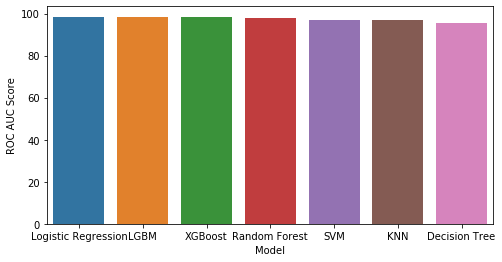

In [102]:
plt.figure(figsize=(8,4))
sns.barplot(model_dict.index,model_dict.values)
plt.xlabel('Model')
plt.ylabel('ROC AUC Score')
plt.show()

- From above Information we can understand that Best Model for balanced data set is Logistic Regrssion with  98.49 AUC in test data

### Print the important features of the best model to understand the dataset

In [98]:
features = np.abs(pd.Series(dict(zip(list(X_train.columns),clf_logic_smt.coef_[0])))).sort_values(ascending=False)

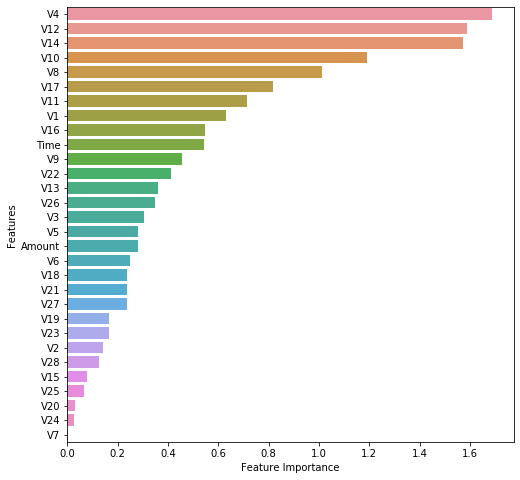

In [103]:
plt.figure(figsize=(8,8))
sns.barplot(y=features.index,x=features.values)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

### Print the FPR,TPR & select the best threshold from the roc curve

#### 1. Logistic Regression with SMOTE Model (Best Model : Model with high AUC ROC Score)

In [35]:
clf_logic_smt= linear_model.LogisticRegression(C=3237.45754281764, penalty='l2',random_state=42)

#fit the model
clf_logic_smt.fit(X_train_smt, y_train_smt)

# predict  on train data
y_train_pred_proba = clf_logic_smt.predict_proba(X_train_smt)[:,1]

In [36]:
print('Train auc =', metrics.roc_auc_score(y_train_smt,y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smt,y_train_pred_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold is : " ,threshold)

Train auc = 0.9915327031092884
Threshold is :  0.43971406117259115


- <font color='purple'> Threshold is :  0.4397 </font>

In [37]:
y_test_pred_proba = clf_logic_smt.predict_proba(X_test)[:,1]
y_test_pred_lr = (pd.Series(y_test_pred_proba) > threshold).astype('int')
y_test = pd.Series(y_test).reset_index(drop=True)

In [38]:
print(classification_report(y_test,y_test_pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     71079
           1       0.05      0.92      0.09       123

    accuracy                           0.97     71202
   macro avg       0.52      0.94      0.53     71202
weighted avg       1.00      0.97      0.98     71202



- <font color='red'> Though the recall is 92%, we get only 5% precision which in turn detects many non-fraudulent transactions into fraud transactions </font>

#### 2. XGBoost Model with default class weight value (For Optimum Precision, Recall)

In [39]:
clf_xgb = XGBClassifier(silent=False, 
                      min_child_weight=3,
                      max_depth=4,
                      gamma=0.0,
                      learning_rate=0.1,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      scale_pos_weight=577.8753387533875,
                       
                      )
# fit
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0.3,
              reg_lambda=1, scale_pos_weight=577.8753387533875, silent=False,
              subsample=0.8, tree_method=None, validate_parameters=False,
              verbosity=None)

In [40]:
# predict  on train data
y_train_pred_proba_xg = clf_xgb.predict_proba(X_train)[:,1]

In [41]:
# predict on test data
y_test_pred_proba_xg = clf_xgb.predict_proba(X_test)[:,1]

#### Method to find cut off probability for optimum precision and recall

In [42]:
def cut_off_precision_recall(y_train,y_train_pred_prob,y_test,y_test_pred_prob):
    ranges = np.arange(0.1,1.01,.01)
    diff = []
    for i in ranges:
        y_train_pred = (pd.Series(y_train_pred_prob) > i).astype('int')
        tn, fp, fn, tp = confusion_matrix(y_train,y_train_pred).ravel()
        precision = tp / (tp+fp)
        recall = tp /(tp+fn)
        diff.append(np.abs(precision-recall))
        
    cut_off_probability = ranges[diff.index(min(diff))]
    print('Cut off probability is ',cut_off_probability)
    
    y_test_pred = (pd.Series(y_test_pred_prob) > cut_off_probability).astype('int')
    tn, fp, fn, tp = confusion_matrix(y_test,y_test_pred).ravel()
    print('Precision for test data : ', round((tp/(tp+fp))*100,4))
    print('Recall for test data :', round((tp/(tp+fn))*100,4))

In [43]:
cut_off_precision_recall(y_train,y_train_pred_proba_xg,y_test,y_test_pred_proba_xg)

Cut off probability is  0.20999999999999996
Precision for test data :  89.6552
Recall for test data : 84.5528


In [44]:
# Predicted test values
y_test_pred_xg = (pd.Series(y_test_pred_proba_xg) > 0.21).astype('int')

In [45]:
print(classification_report(y_test,y_test_pred_xg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.90      0.85      0.87       123

    accuracy                           1.00     71202
   macro avg       0.95      0.92      0.94     71202
weighted avg       1.00      1.00      1.00     71202



### Cost Benefit Analysis Using Logistic Regression model and XGBoost Model

In [46]:
cost_df = df.loc[X_test.index][['Amount','Class']].reset_index(drop=True)

In [47]:
cost_df['LR_Predicted'] = y_test_pred_lr

In [48]:
cost_df['XGB_Predicted'] = y_test_pred_xg

In [49]:
cost_df.shape

(71202, 4)

In [50]:
cost_df['LR_COST_Benefit'] = 0
for i in range(cost_df.shape[0]):
    if (cost_df.loc[i,'Class'] == 1) and (cost_df.loc[i,'LR_Predicted']==1):
        cost_df.loc[i,'LR_COST_Benefit'] = cost_df.loc[i,'Amount'] - 10
    elif (cost_df.loc[i,'Class']==1) and (cost_df.loc[i,'LR_Predicted']==0):
        cost_df.loc[i,'LR_COST_Benefit'] = -1 * cost_df.loc[i,'Amount']
    elif (cost_df.loc[i,'Class']==0) and (cost_df.loc[i,'LR_Predicted']==1):
        cost_df.loc[i,'LR_COST_Benefit'] = -10
    else:
        cost_df.loc[i,'LR_COST_Benefit'] = 0

In [51]:
cost_df['XGB_COST_Benefit'] = 0
for i in range(cost_df.shape[0]):
    if (cost_df.loc[i,'Class'] == 1) and (cost_df.loc[i,'XGB_Predicted']==1):
        cost_df.loc[i,'XGB_COST_Benefit'] = cost_df.loc[i,'Amount']-10
    elif (cost_df.loc[i,'Class']==1) and (cost_df.loc[i,'XGB_Predicted']==0):
        cost_df.loc[i,'XGB_COST_Benefit'] = -1 * cost_df.loc[i,'Amount']
    elif (cost_df.loc[i,'Class']==0) and (cost_df.loc[i,'XGB_Predicted']==1):
        cost_df.loc[i,'XGB_COST_Benefit'] = -10
    else:
        cost_df.loc[i,'XGB_COST_Benefit'] = 0

In [52]:
print('Amount saved by LR model is :', round(sum(cost_df['LR_COST_Benefit']),2))

Amount saved by LR model is : -15233.68


In [53]:
print('Amount saved by XGB Model is :', round(sum(cost_df['XGB_COST_Benefit']),2))

Amount saved by XGB Model is : 4636.52


#### Conclusion

- <font color='purple'> Though, recall is high(92%) and precision is very low(5%), the cost benefit from logistic regression model is negative (-15233.68) since the amount saved from the fraud transaction is very less compared to the cost spend for validating non fraudulent transactions </font>

</br>

- <font color='green'> Since, we have chosen XGBoost model with optimum precision and recall, business can save around 4636.52 by detecting the fraud transactions using XGBoost model.